# **<center>`SmartBuy: Predictive Analytics for Laptop Prices`**

# **`A. Problem Statement`**

Laptop prices vary significantly based on multiple factors such as specifications, brand, and market demand. Businesses and consumers often struggle to determine a fair price for a laptop, leading to inefficiencies in purchasing and pricing decisions. **SmartBuy: Predictive Analytics for Laptop Prices** aims to solve this problem by developing an intelligent pricing model that accurately predicts laptop prices based on key attributes, enabling data-driven decision-making.

# **`B. Objective`**
- Develop an AI-driven predictive model to estimate laptop prices using machine learning techniques.
- Identify critical factors (e.g., processor type, RAM, storage, display resolution, brand) that significantly impact pricing.
- Provide accurate price recommendations to help consumers make informed purchasing decisions and businesses optimize pricing strategies.
- Enhance inventory management for retailers by forecasting price trends and adjusting stock accordingly.
- Enable competitive analysis by benchmarking laptop prices against market trends to improve profitability and customer engagement.

# **`C. Predictive Model`**

# **`1. Import Required Libraries`**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
pd.set_option('display.max_columns', None)

# **`2. Load Data`**

In [3]:
project_dir = r'C:\Users\anike\DATA SCIENCE AND AI\ML Projects\smartbuy-predictive-analytics-for-laptop-prices'
file_dir = 'data\original'

def load_data(filename):
    file_name = f'{filename}.csv'
    file_path = os.path.join(project_dir, file_dir, file_name)
    return pd.read_csv(file_path)

In [4]:
data = load_data('laptop_data')
print('Data Loaded')

Data Loaded


# **`3. Overview of the Data`**
## **`3.1. General Overview`**

In [5]:
print(f"Number of entries in the data: {data.shape[0]}")
print(f"Number of features in the data: {data.shape[1]}")

Number of entries in the data: 1303
Number of features in the data: 12


In [6]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
data.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


## **`3.2. Overview - Name & Datatype`**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### **`3.1. & 3.2. Observations`**
- There are **1303** entries/rows and **12** features/columns in the data.
- Features of data contains **9 object** datatypes, **2 float** datatypes and **1 int** datatype.
- Datatypes of some columns to be changed after further exploration.
- Column names to be **renamed** for consistency.

## **`3.3. Check for Duplicate Entries`**

In [9]:
if data.duplicated().sum() > 0:
    print(f"There are {data.duplicated().sum()} duplicate entries/rows in the data.")
else:
    print('There are no duplicate entries/rows in the data.')

There are no duplicate entries/rows in the data.


### **`3.3. Observations`**
- There are **no** duplicate records in the data.

## **`3.4. Check for Missing values`**

In [10]:
flag = 0

print('Missing Values:\n')
for col in data.columns:
    if data[col].isnull().sum() > 0:
        flag = 1
        print(f"{col}: {data[col].isnull().sum()} ({(data[col].isnull().sum()*100/data.shape[0]):0.4f})")
else:
    if flag == 0:
        print('There are no missing values in the data.')

Missing Values:

There are no missing values in the data.


### **`3.4. Observations`**
- There are **no** missing values in the data.

## **`3.5. Check for Data Correctness`**

In [11]:
cat_data_summary = (
    data
    .select_dtypes('object')
    .describe()
    .T
    .sort_values(by = 'unique')
    .rename_axis(index = 'feature')
)

display(cat_data_summary)

,count,unique,top,freq
feature,,,,
TypeName,1303,6,Notebook,727
Ram,1303,9,8GB,619
OpSys,1303,9,Windows 10,1072
Company,1303,19,Dell,297
Memory,1303,39,256GB SSD,412
ScreenResolution,1303,40,Full HD 1920x1080,507
Gpu,1303,110,Intel HD Graphics 620,281
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190
Weight,1303,179,2.2kg,121


In [12]:
cat_list = cat_data_summary.index.to_list()
print('Feature-wise unique categories:\n')
for col in cat_list:
   print(f"{col}:\n{data[col].unique()}\n")

Feature-wise unique categories:

TypeName:
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']

Ram:
['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']

OpSys:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

Company:
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Memory:
['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'

In [13]:
(
    data
    .select_dtypes('number')
    .describe()
    .T
    .rename_axis(index = 'feature')
)

,count,mean,std,min,25%,50%,75%,max
feature,,,,,,,,
Unnamed: 0,1303.0,651.000000,376.288010,0.00,325.50,651.00,976.5000,1302.00
Inches,1303.0,15.017191,1.426304,10.10,14.00,15.60,15.6000,18.40
Price,1303.0,59870.042910,37243.201786,9270.72,31914.72,52054.56,79274.2464,324954.72


In [14]:
for col in cat_list:
    count = data[col].value_counts()
    proportion = data[col].value_counts(normalize = True) * 100
    distribution_df = pd.concat([count,proportion], axis = 1)
    distribution_df.columns = ['count','percentage']
    print(f"Distribution of {col} Feature:")
    display(distribution_df)

Distribution of TypeName Feature:


,count,percentage
TypeName,,
Notebook,727,55.794321
Gaming,205,15.732924
Ultrabook,196,15.042210
2 in 1 Convertible,121,9.286262
Workstation,29,2.225633
Netbook,25,1.918649


Distribution of Ram Feature:


,count,percentage
Ram,,
8GB,619,47.505756
4GB,375,28.779739
16GB,200,15.349194
6GB,41,3.146585
12GB,25,1.918649
2GB,22,1.688411
32GB,17,1.304682
24GB,3,0.230238
64GB,1,0.076746


Distribution of OpSys Feature:


,count,percentage
OpSys,,
Windows 10,1072,82.271681
No OS,66,5.065234
Linux,62,4.758250
Windows 7,45,3.453569
Chrome OS,27,2.072141
macOS,13,0.997698
Mac OS X,8,0.613968
Windows 10 S,8,0.613968
Android,2,0.153492


Distribution of Company Feature:


,count,percentage
Company,,
Dell,297,22.793553
Lenovo,297,22.793553
HP,274,21.028396
Asus,158,12.125863
Acer,103,7.904835
MSI,54,4.144282
Toshiba,48,3.683807
Apple,21,1.611665
Samsung,9,0.690714


Distribution of Memory Feature:


,count,percentage
Memory,,
256GB SSD,412,31.619340
1TB HDD,223,17.114351
500GB HDD,132,10.130468
512GB SSD,118,9.056025
128GB SSD + 1TB HDD,94,7.214121
128GB SSD,76,5.832694
256GB SSD + 1TB HDD,73,5.602456
32GB Flash Storage,38,2.916347
2TB HDD,16,1.227936


Distribution of ScreenResolution Feature:


,count,percentage
ScreenResolution,,
Full HD 1920x1080,507,38.910207
1366x768,281,21.565618
IPS Panel Full HD 1920x1080,230,17.651573
IPS Panel Full HD / Touchscreen 1920x1080,53,4.067536
Full HD / Touchscreen 1920x1080,47,3.607061
1600x900,23,1.765157
Touchscreen 1366x768,16,1.227936
Quad HD+ / Touchscreen 3200x1800,15,1.151190
IPS Panel 4K Ultra HD 3840x2160,12,0.920952


Distribution of Gpu Feature:


,count,percentage
Gpu,,
Intel HD Graphics 620,281,21.565618
Intel HD Graphics 520,185,14.198005
Intel UHD Graphics 620,68,5.218726
Nvidia GeForce GTX 1050,66,5.065234
Nvidia GeForce GTX 1060,48,3.683807
...,...,...
AMD Radeon R5 520,1,0.076746
AMD Radeon R7,1,0.076746
Intel HD Graphics 540,1,0.076746


Distribution of Cpu Feature:


,count,percentage
Cpu,,
Intel Core i5 7200U 2.5GHz,190,14.581734
Intel Core i7 7700HQ 2.8GHz,146,11.204912
Intel Core i7 7500U 2.7GHz,134,10.283960
Intel Core i7 8550U 1.8GHz,73,5.602456
Intel Core i5 8250U 1.6GHz,72,5.525710
...,...,...
Intel Core M M3-6Y30 0.9GHz,1,0.076746
AMD A9-Series 9420 2.9GHz,1,0.076746
Intel Core i3 6006U 2.2GHz,1,0.076746


Distribution of Weight Feature:


,count,percentage
Weight,,
2.2kg,121,9.286262
2.1kg,58,4.451266
2.4kg,44,3.376823
2.3kg,41,3.146585
2.5kg,38,2.916347
...,...,...
3.25kg,1,0.076746
4.7kg,1,0.076746
1.55kg,1,0.076746


### **`3.5. Observations`**

**`Unnamed: 0`**
- This feature **to be dropped** as it represents only the index values with no information for our model

**`OpSys`**
- Feature to be **renamed** as **os**
- To be **categorized** into **Windows, Mac, Others/Linux/No**
- (i.e) club 'Windows 10', 'Windows 10 S', 'Windows 7' as 'Windows'; 'macOS' & 'Mac OS X' as 'Mac' and 'Linux', 'Android', 'Chrome' & 'No' as 'Others/Linux/No

**`Gpu`**
- Feature to be **categorized** into **Intel**, **Nvidia**, **AMD**, **ARM** and **Other** with feature name as **gpu_company**

**`Cpu`**
- Using feature engineering, **2 new** features to be **extracted** namely **cpu_company** (with categories as **Intel Core i3**, **Intel Core i5**, **Intel Core i7**, **Intel Other**, **AMD** and **Samsung**) and **cpu_freq (in GHz)**
  
**`ScreenResolution`**
- This feature contains information about the type of screen, whether it has touchscreen, IPS panel or Retina display and screen resolution
- **4 new** features to be **extracted** from this feature namely **screen_type**, **touchscreen**, **ips_panel**, **retina_display**, **resolution**
- **resolution** feature can be further used to convert into **x_res** and **y_res** and finally create new feature **ppi** pixels per inches using 'x_res', 'y_res' and 'inches' features

**`Memory`**
- **4 new** features to be **extracted** namely **ssd**, **hdd**, **flash_storage** and **hybrid**

**`Ram`**
- Feature to be **renamed** as **ram**
- Datatype to be changed to **int** after **replacing GB** with **''**

**`Weight`**
- Feature to be **renamed** as **weight**
- Datatype to be changed to **int** after **replacing Kg** with **''**

# **`4. Data Cleaning and Feature Engineering`**

In [15]:
def give_screen_type(str):
    if 'Full HD' in str:
        return 'Full HD'
    elif 'Ultra HD' in str:
        return 'Ultra HD'
    elif 'Quad HD+' in str:
        return 'Quad HD+'
    else:
        return 'Standard'

In [16]:
def get_cpu_model(str):
    if 'Intel Core i3' in str:
        return 'Intel Core i3'
    elif 'Intel Core i5' in str:
        return 'Intel Core i5'
    elif 'Intel Core i7' in str:
        return 'Intel Core i7'
    elif 'Intel' in str:
        return 'Intel Other'
    elif 'AMD' in str:
        return 'AMD'
    else:
        return 'Samsung'

In [17]:
def get_gpu_company(str):
    if 'Intel' in str:
        return 'Intel'
    elif 'Nvidia' in str:
        return 'Nvidia'
    elif 'AMD' in str:
        return 'AMD'
    elif 'ARM' in str:
        return 'ARM'
    else:
        return 'Other'

In [18]:
def get_os(str):
    if 'Windows' in str:
        return 'Windows'
    elif 'mac' in str.lower():
        return 'Mac'
    else:
        return 'Other/Linux/No'

In [19]:
def extract_storage(storage):
    storage_types = {
        'ssd': 0, 'hdd': 0, 'flash storage': 0, 'hybrid': 0
    }
    
    parts = storage.split('+')
    
    for part in parts:
        num_value = re.findall(r'\d+\.?\d*', part)[0]  # Extract numeric value
        num_value = float(num_value)  # Convert to float
        
        # Convert TB to GB if 'TB' is present
        if 'TB' in part:
            num_value *= 1024
        
        # Assign values based on storage type
        for key in storage_types.keys():
            if key.lower() in part.lower():
                storage_types[key] = int(num_value)
    
    return pd.Series(storage_types)

In [20]:
data1  = (
    data
    .rename(
        {'TypeName':'type_name', 'OpSys': 'os'},
        axis = 'columns'
    )
    .assign(
        os = lambda df_: df_['os'].apply(get_os),

        gpu_company = lambda df_: df_['Gpu'].apply(get_gpu_company),

        cpu_model = lambda df_: df_['Cpu'].apply(get_cpu_model),
        cpu_freq1 = lambda df_: df_['Cpu'].str.split(' ').str[-1],
        cpu_freq = lambda df_:df_['cpu_freq1'].str.replace('GHz','').astype('float'),
        
        screen_type = lambda df_: df_['ScreenResolution'].apply(give_screen_type),
        touchscreen = lambda df_: df_['ScreenResolution'].str.contains('Touchscreen').astype('int'),
        ips_panel = lambda df_: df_['ScreenResolution'].str.contains('IPS Panel').astype('int'),
        retina_display = lambda df_: df_['ScreenResolution'].str.contains('Retina Display').astype('int'),

        resolution = lambda df_: df_['ScreenResolution'].str.split(' ').str[-1],
        x_res = lambda df_: df_['resolution'].str.split('x').str[0].astype('int'),
        y_res = lambda df_: df_['resolution'].str.split('x').str[1].astype('int'),
        ppi = lambda df_: ((df_['x_res']**2 + df_['y_res']**2)**0.5)/df_['Inches'],
        
        Ram = lambda df_: df_['Ram'].str.replace('GB', '').astype('int'),
        Weight = lambda df_: df_['Weight'].str.replace('kg', '').astype('float'),

        Price = lambda df_: np.round(df_['Price'])
     )
    .drop(columns = ['Unnamed: 0','resolution', 'ScreenResolution', 
                     'x_res', 'y_res', 'cpu_freq1', 'Cpu', 'Gpu', 'Memory'])
    .rename(str.lower, axis = 'columns')
)

data2 = data['Memory'].apply(extract_storage)

In [21]:
data1.head()

,company,type_name,inches,ram,os,weight,price,gpu_company,cpu_model,cpu_freq,screen_type,touchscreen,ips_panel,retina_display,ppi
0,Apple,Ultrabook,13.3,8,Mac,1.37,71379.0,Intel,Intel Core i5,2.3,Standard,0,1,1,226.983005
1,Apple,Ultrabook,13.3,8,Mac,1.34,47896.0,Intel,Intel Core i5,1.8,Standard,0,0,0,127.677940
2,HP,Notebook,15.6,8,Other/Linux/No,1.86,30636.0,Intel,Intel Core i5,2.5,Full HD,0,0,0,141.211998
3,Apple,Ultrabook,15.4,16,Mac,1.83,135195.0,AMD,Intel Core i7,2.7,Standard,0,1,1,220.534624
4,Apple,Ultrabook,13.3,8,Mac,1.37,96096.0,Intel,Intel Core i5,3.1,Standard,0,1,1,226.983005


In [22]:
data2.head()

,ssd,hdd,flash storage,hybrid
0,128,0,0,0
1,0,0,128,0
2,256,0,0,0
3,512,0,0,0
4,256,0,0,0


In [23]:
df = pd.concat([data1, data2], axis = 'columns')
df = df[['company', 'type_name', 'os', 'gpu_company', 'cpu_model', 
    'screen_type', 'touchscreen', 'ips_panel', 'retina_display',
    'inches', 'ppi', 'ssd', 'hdd', 'flash storage', 'hybrid',
    'ram', 'weight', 'cpu_freq', 'price']]
df.head()

,company,type_name,os,gpu_company,cpu_model,screen_type,touchscreen,ips_panel,retina_display,inches,ppi,ssd,hdd,flash storage,hybrid,ram,weight,cpu_freq,price
0,Apple,Ultrabook,Mac,Intel,Intel Core i5,Standard,0,1,1,13.3,226.983005,128,0,0,0,8,1.37,2.3,71379.0
1,Apple,Ultrabook,Mac,Intel,Intel Core i5,Standard,0,0,0,13.3,127.677940,0,0,128,0,8,1.34,1.8,47896.0
2,HP,Notebook,Other/Linux/No,Intel,Intel Core i5,Full HD,0,0,0,15.6,141.211998,256,0,0,0,8,1.86,2.5,30636.0
3,Apple,Ultrabook,Mac,AMD,Intel Core i7,Standard,0,1,1,15.4,220.534624,512,0,0,0,16,1.83,2.7,135195.0
4,Apple,Ultrabook,Mac,Intel,Intel Core i5,Standard,0,1,1,13.3,226.983005,256,0,0,0,8,1.37,3.1,96096.0


# **`5. Exploratory Data Analysis`**

In [24]:
def distribution_summary(data, col):
    count = data[col].value_counts()
    proportion = data[col].value_counts(normalize = True) * 100
    distribution_df = pd.concat([count,proportion], axis = 1)
    distribution_df.columns = ['count','percentage']
    print(f"Distribution of {col} Feature:")
    return distribution_df

In [25]:
def count_plot(data, features, size_x = 10, size_y = 6):
    num_plots = len(features)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    plt.figure(figsize = (size_x,size_y))
    for i, col in enumerate(features):
        
        plt.subplot(num_rows,num_cols,i+1)
        ax = sns.countplot(data = data, x = col, edgecolor = 'black',
                           order = data[col].value_counts().index, palette = 'Spectral')
        for bars in ax.containers:
            ax.bar_label(bars, fontsize = 14)
        plt.xticks(rotation = 25, ha='right', fontsize = 20)
        plt.xlabel(col, fontdict = {'size' : 23})
        plt.ylabel('Count', fontdict = {'size' : 23})
        plt.title(f"Count of '{col}' Feature", fontdict = {'size' : 25})
        plt.tight_layout()
    plt.show()

In [26]:
def pie_plot(data, features, size_x = 10, size_y = 6, title_size = 20):
    num_plots = len(features)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    plt.figure(figsize = (size_x,size_y))
    for i, col in enumerate(features):
    
        values = data[col].value_counts().values
        labels = data[col].value_counts().index
        explode = [0.05 for label in range(len(labels))]
        
        plt.subplot(num_rows,num_cols,i+1)
        ax = plt.pie(x = values, labels = labels, autopct = '%0.2f%%', explode = explode)
        plt.title(f"Distribution of '{col}' Feature", fontdict = {'size' : title_size})
        plt.legend(bbox_to_anchor=(1, 1))
        plt.tight_layout()
    plt.show()

In [27]:
def bar_plot(data, x, y, hue = None, size_x = 10, size_y = 4, flag = 0):
    plt.figure(figsize = (size_x,size_y))
    if hue == None:
        ax = sns.barplot(data = data, x = x, y = y,
                         palette = 'Set1', edgecolor = 'black')
    else:
        ax = sns.barplot(data = data, x = x, y = y, hue = hue,
                        palette = 'Set1', edgecolor = 'black')  
    if flag == 0:
        for bars in ax.containers:
            ax.bar_label(bars)
    plt.xticks(rotation = 25, ha = 'right')
    plt.title(f'{y.capitalize()} vs {x.capitalize()}', fontsize = 15)
    plt.xlabel(x.capitalize(), fontsize = 13)
    plt.ylabel(y.capitalize(), fontsize = 13)
    plt.legend(bbox_to_anchor = (1,1))
    plt.show()

In [28]:
def hist_plot(data, x, kde = True):
    sns.histplot(data = data, x = x, kde = kde)
    sns.rugplot(data = data, x = x, color = 'black')
    plt.xticks(rotation = 25, ha = 'right')
    plt.xlabel(x, fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.title(f'Distribution - {x}', fontsize = 18)

def box_plot(data, x, color = 'green', fill = False):
    sns.boxplot(data = data, x = x, color = 'green', fill = False)
    plt.xticks(rotation = 25, ha = 'right')
    plt.xlabel(x, fontsize = 15)
    plt.title(f'Boxplot - {x}', fontsize = 18)

In [29]:
def bivariate_plot(data, features, target, size_x = 10, size_y = 6):
    num_plots = len(features)
    num_cols = 2
    num_rows = (num_plots + num_cols - 1) // num_cols
    
    plt.figure(figsize=(size_x, size_y))
    
    for i, col in enumerate(features):
        df_group = data.groupby(by=col)[target].mean().sort_values(ascending=False)
        df_sorted = df_group.to_frame().reset_index()
    
        plt.subplot(num_rows, num_cols, i + 1)
        ax = sns.barplot(data=df_sorted, x=col, y=target, edgecolor='black', 
                         palette='Spectral', order=df_sorted[col])
    
        for bars in ax.containers:
            ax.bar_label(bars, fontsize=14)
        plt.xticks(rotation=25, ha='right', fontsize=20)
        plt.xlabel(col, fontdict={'size': 23})
        plt.ylabel(target.capitalize(), fontdict={'size': 23})
        plt.title(f"Average {target} of '{col}' Feature", fontdict={'size': 25})
        plt.tight_layout()
    
    plt.show()

In [30]:
def multivariate_plot(data, col, x, y, title_template, order = None, col_wrap = 3, hue = None,
                      height = 4, aspect = 1.2, sharex = False, sharey = False, flag = 0):
    
    fg = sns.FacetGrid(data = data, col = col, col_wrap = col_wrap, height=height, 
                       aspect = aspect, sharex = sharex, sharey = sharey)
    if hue == None:
        fg.map(sns.barplot, x, y, order = order, 
               errorbar = None, palette = 'Set1', edgecolor = 'black')
    else:
        fg.map(sns.barplot, x, y, hue = df[hue], order = order, 
               errorbar = None, palette = 'Set1', edgecolor = 'black')
        plt.legend(title = hue.capitalize(), bbox_to_anchor = (1,1))

    # fg.set_axis_labels(col1, col2)
    fg.set_xlabels(x.capitalize())
    fg.set_ylabels(y.capitalize())
    fg.set_titles(template = title_template)
    
    for ax in fg.axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha='right')
        if flag == 0:
            for bars in ax.containers:
                ax.bar_label(bars)
    
    plt.tight_layout()
    plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1303 non-null   object 
 1   type_name       1303 non-null   object 
 2   os              1303 non-null   object 
 3   gpu_company     1303 non-null   object 
 4   cpu_model       1303 non-null   object 
 5   screen_type     1303 non-null   object 
 6   touchscreen     1303 non-null   int32  
 7   ips_panel       1303 non-null   int32  
 8   retina_display  1303 non-null   int32  
 9   inches          1303 non-null   float64
 10  ppi             1303 non-null   float64
 11  ssd             1303 non-null   int64  
 12  hdd             1303 non-null   int64  
 13  flash storage   1303 non-null   int64  
 14  hybrid          1303 non-null   int64  
 15  ram             1303 non-null   int32  
 16  weight          1303 non-null   float64
 17  cpu_freq        1303 non-null   f

## **`5.1.a. Categorical Features`**

### **`5.1.1. Summary`**

In [32]:
cat_features_summary = (
    df
    .select_dtypes('object')
    .describe()
    .T
    .sort_values(by = 'unique')
    .rename_axis(index = 'feature')
)

display(cat_features_summary)

,count,unique,top,freq
feature,,,,
os,1303,3,Windows,1125
gpu_company,1303,4,Intel,722
screen_type,1303,4,Full HD,843
type_name,1303,6,Notebook,727
cpu_model,1303,6,Intel Core i7,527
company,1303,19,Dell,297


### **`5.1.2. Uni-Variate Analysis`**

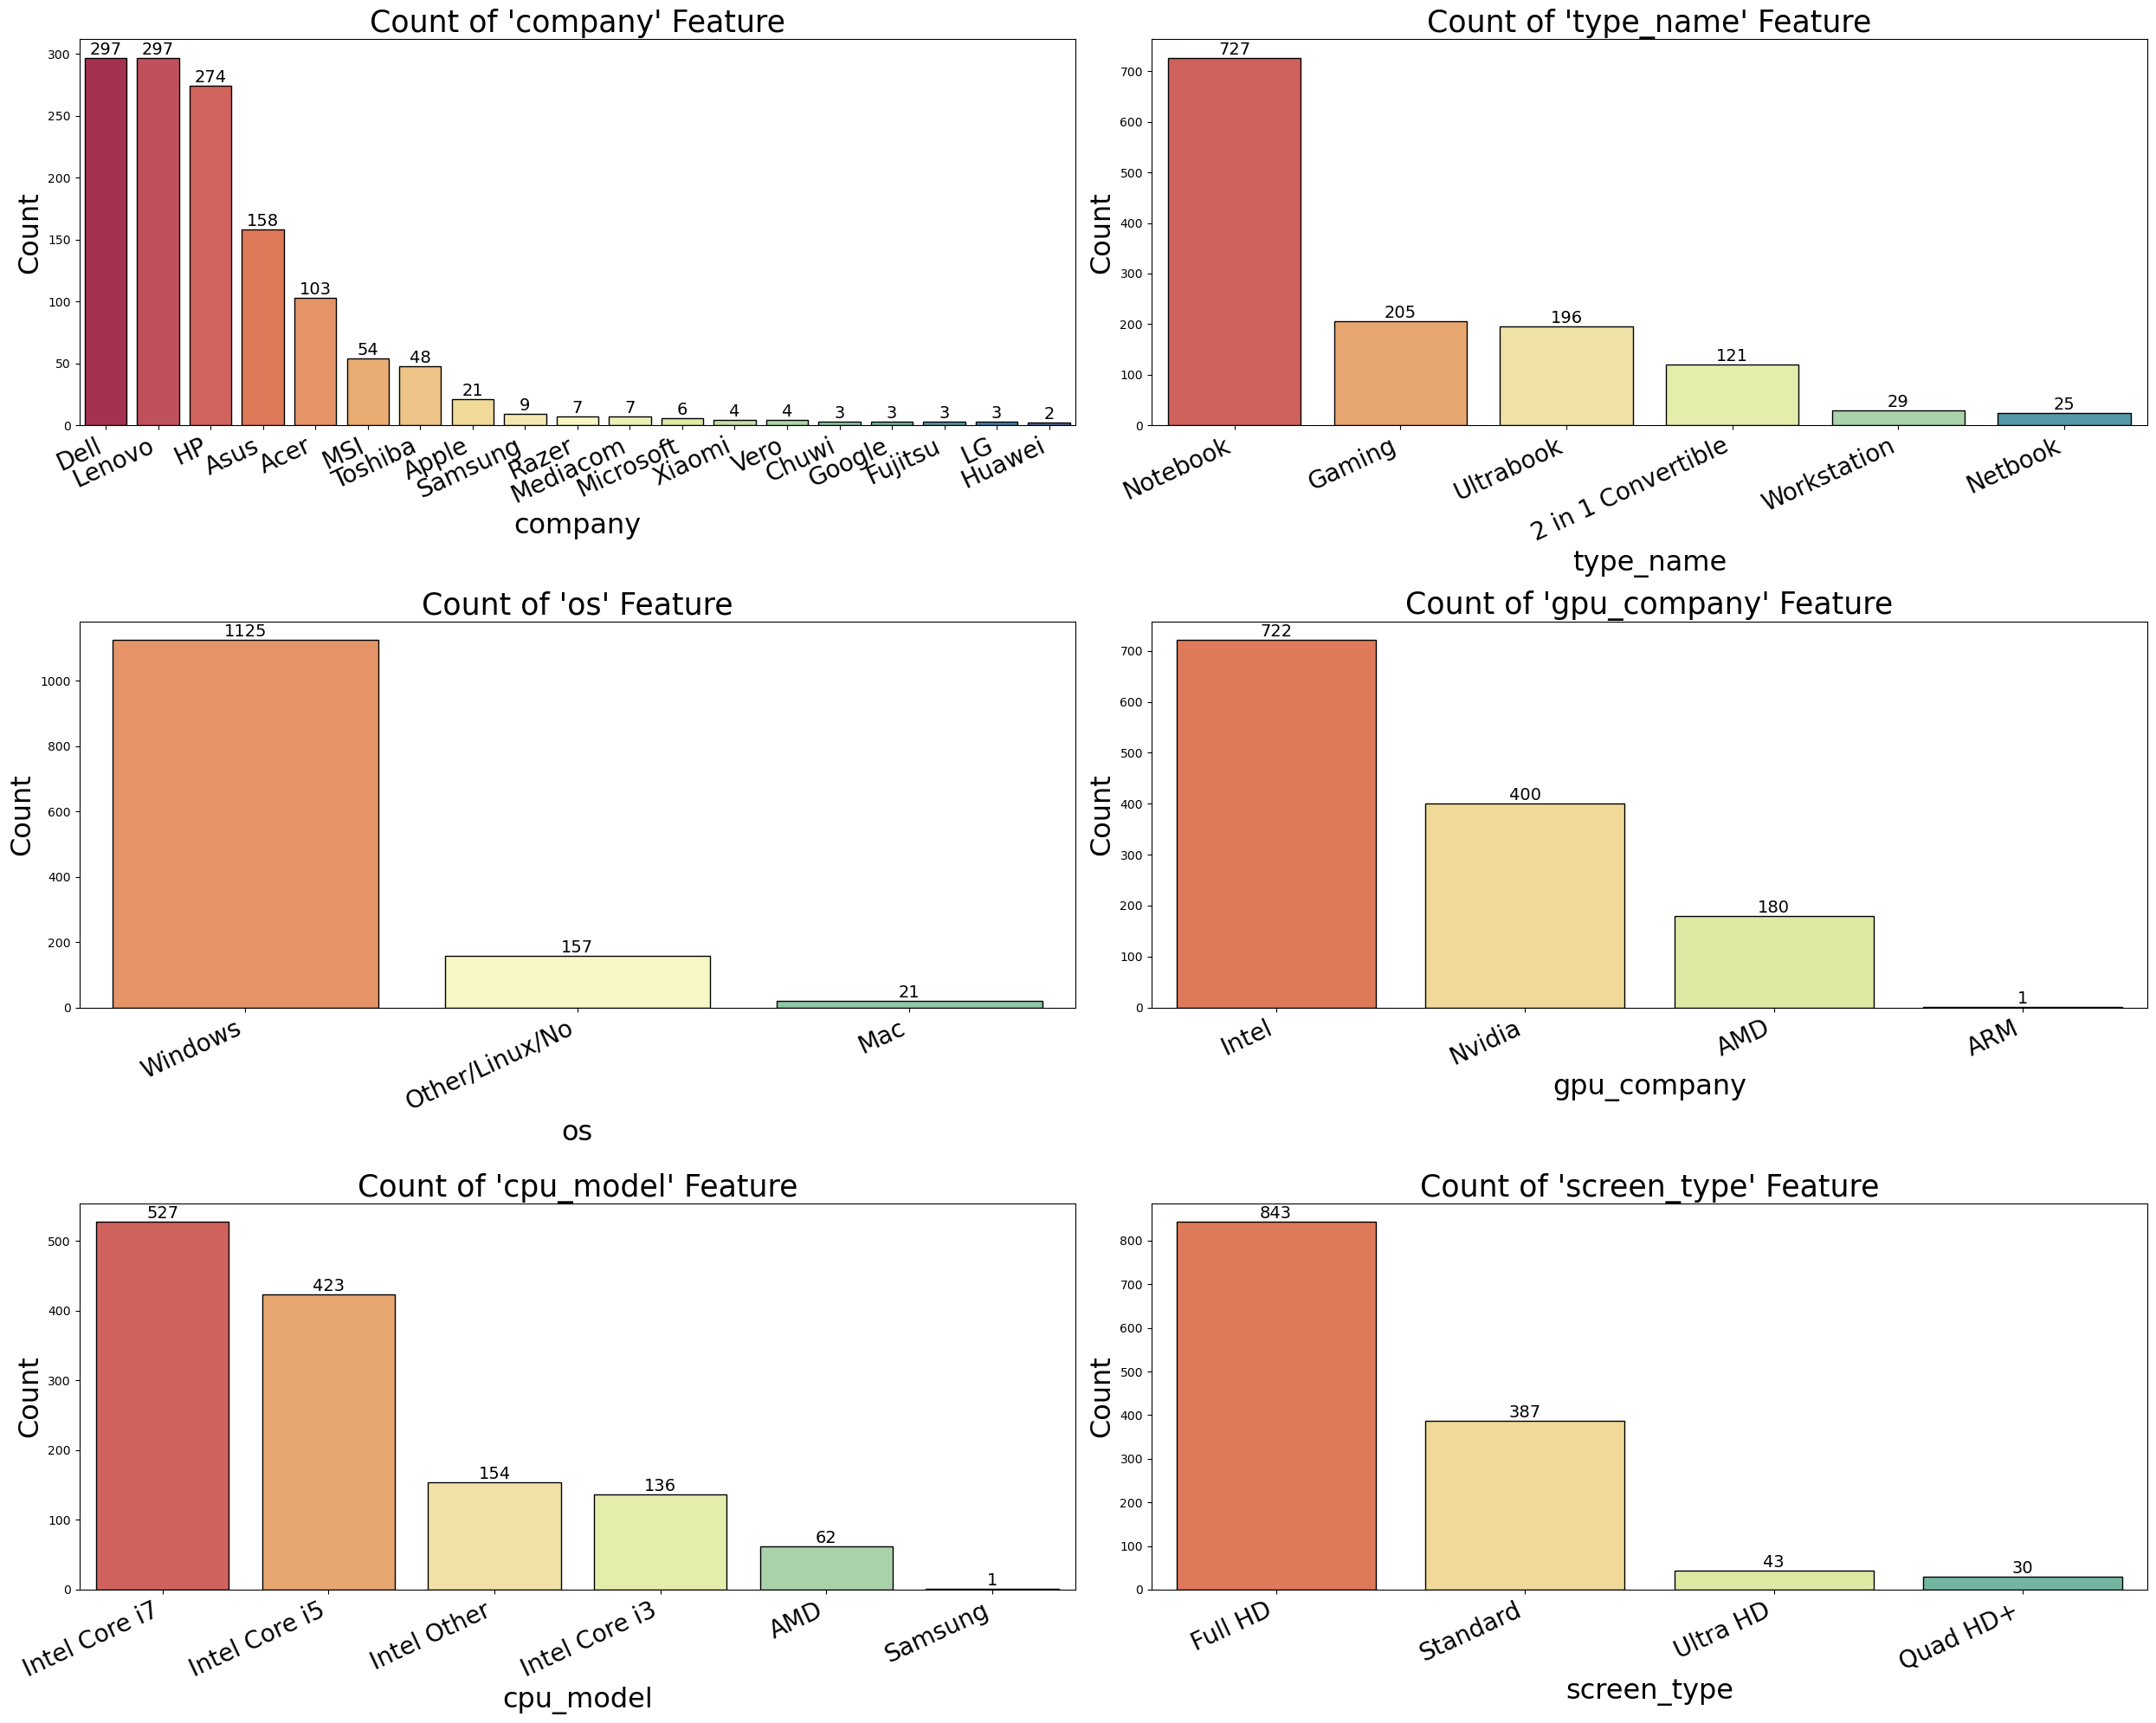

In [33]:
count_plot(data = df,
           features = df.select_dtypes('object').columns, 
           size_x = 25,
           size_y = 20)

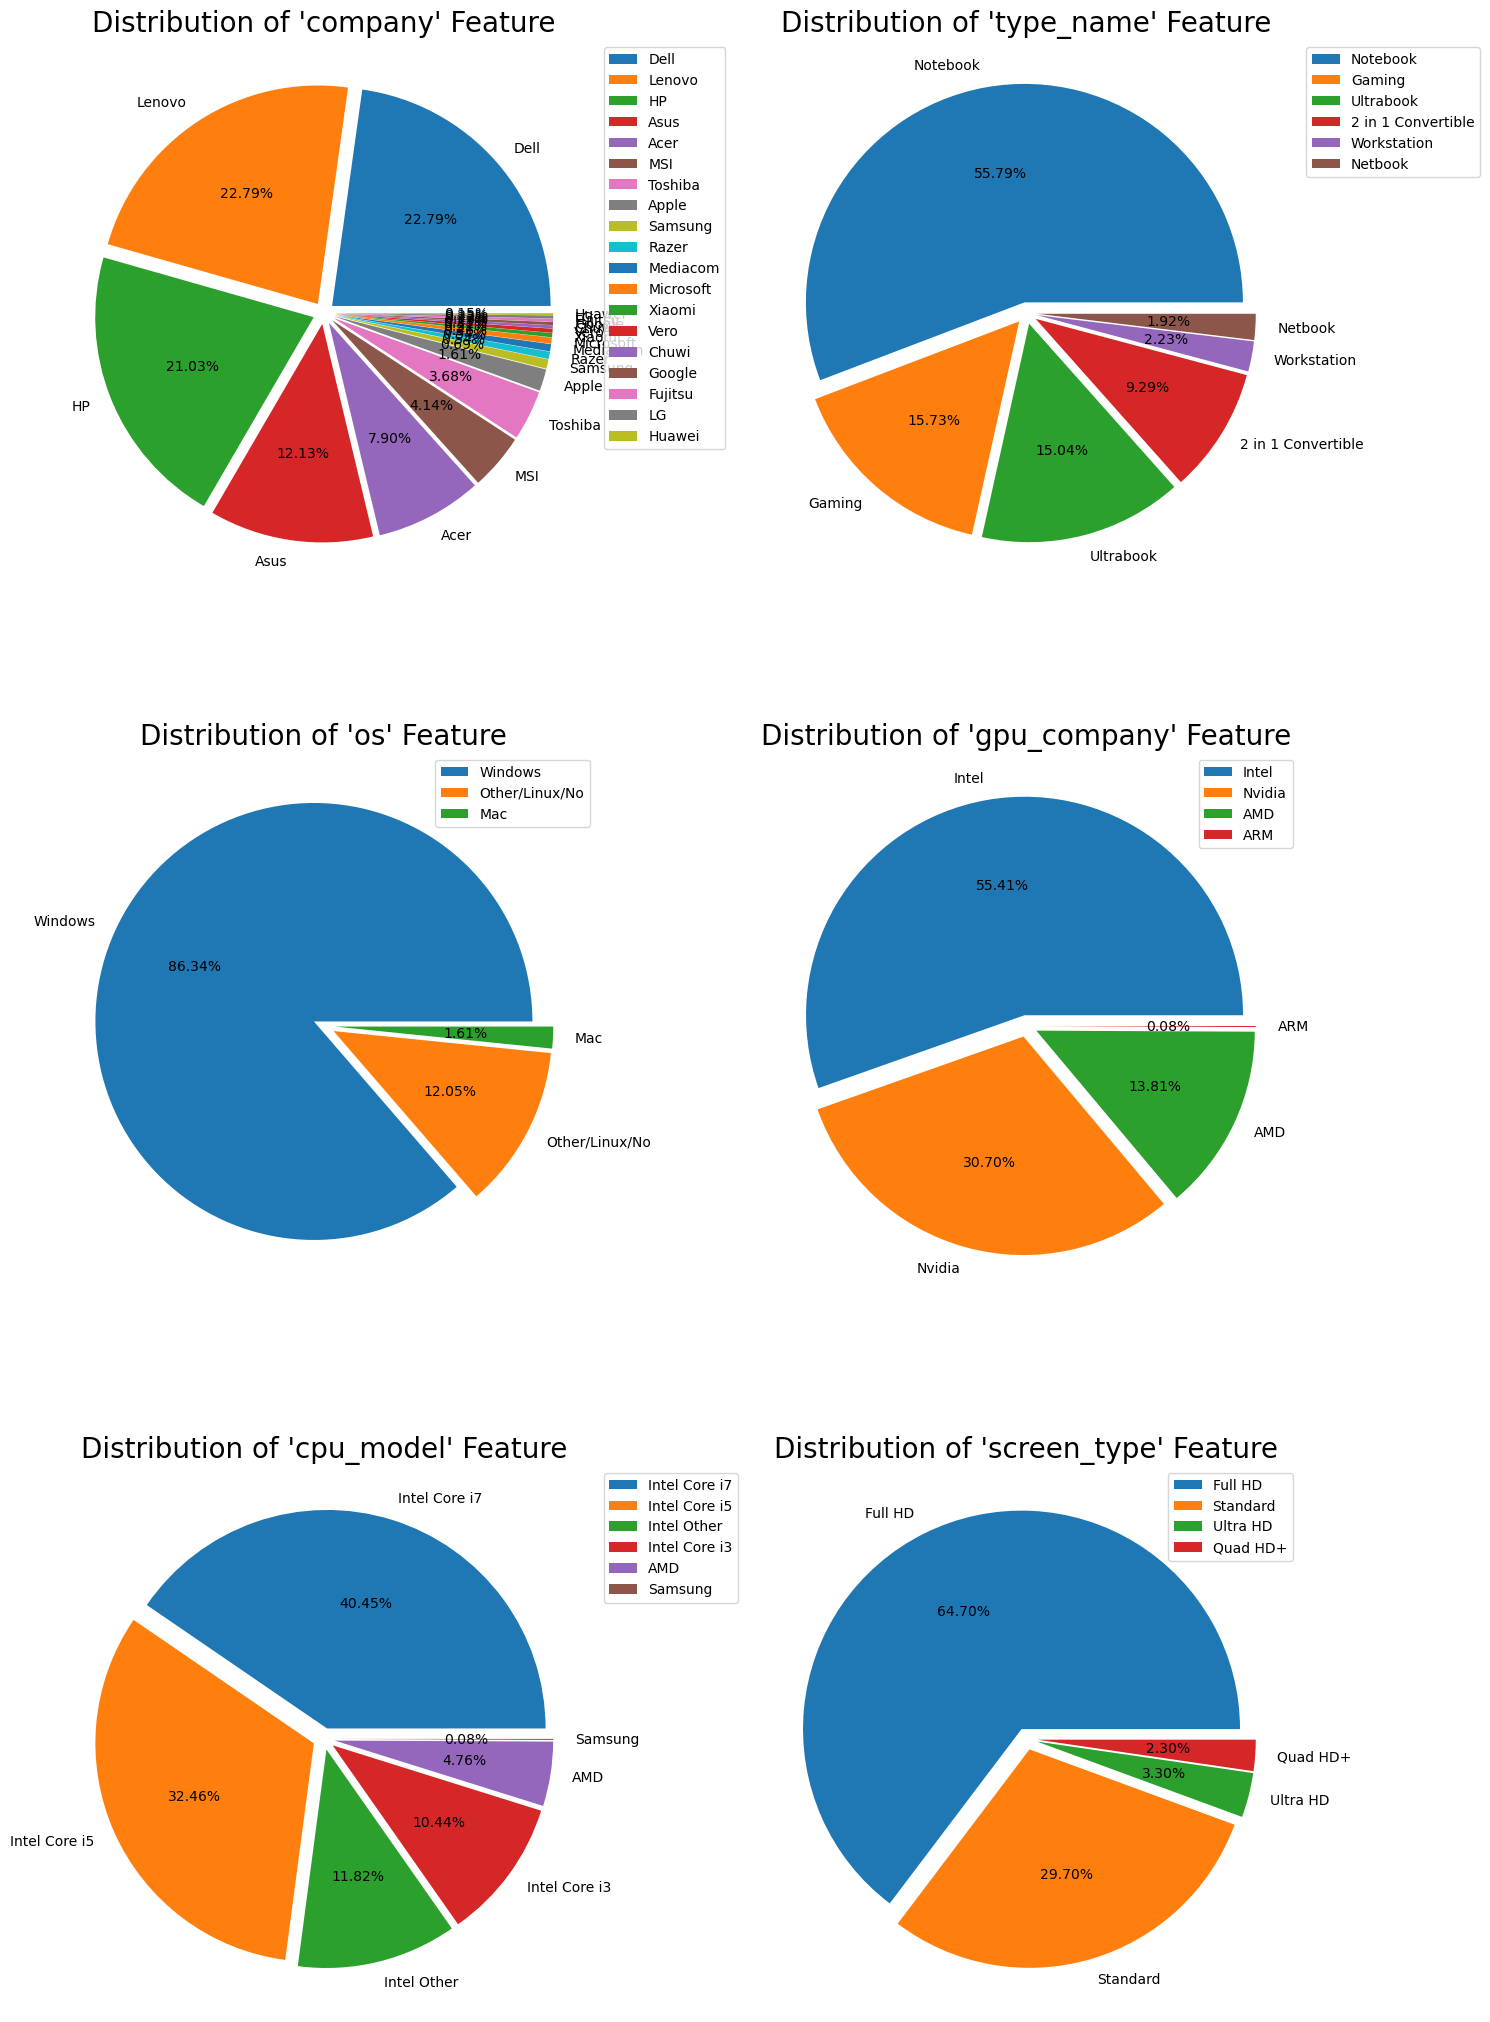

In [34]:
pie_plot(data = df,
         features = df.select_dtypes('object').columns,
         size_x = 15,
         size_y = 25)

### **`5.1.3. Bi-Variate Analysis`**

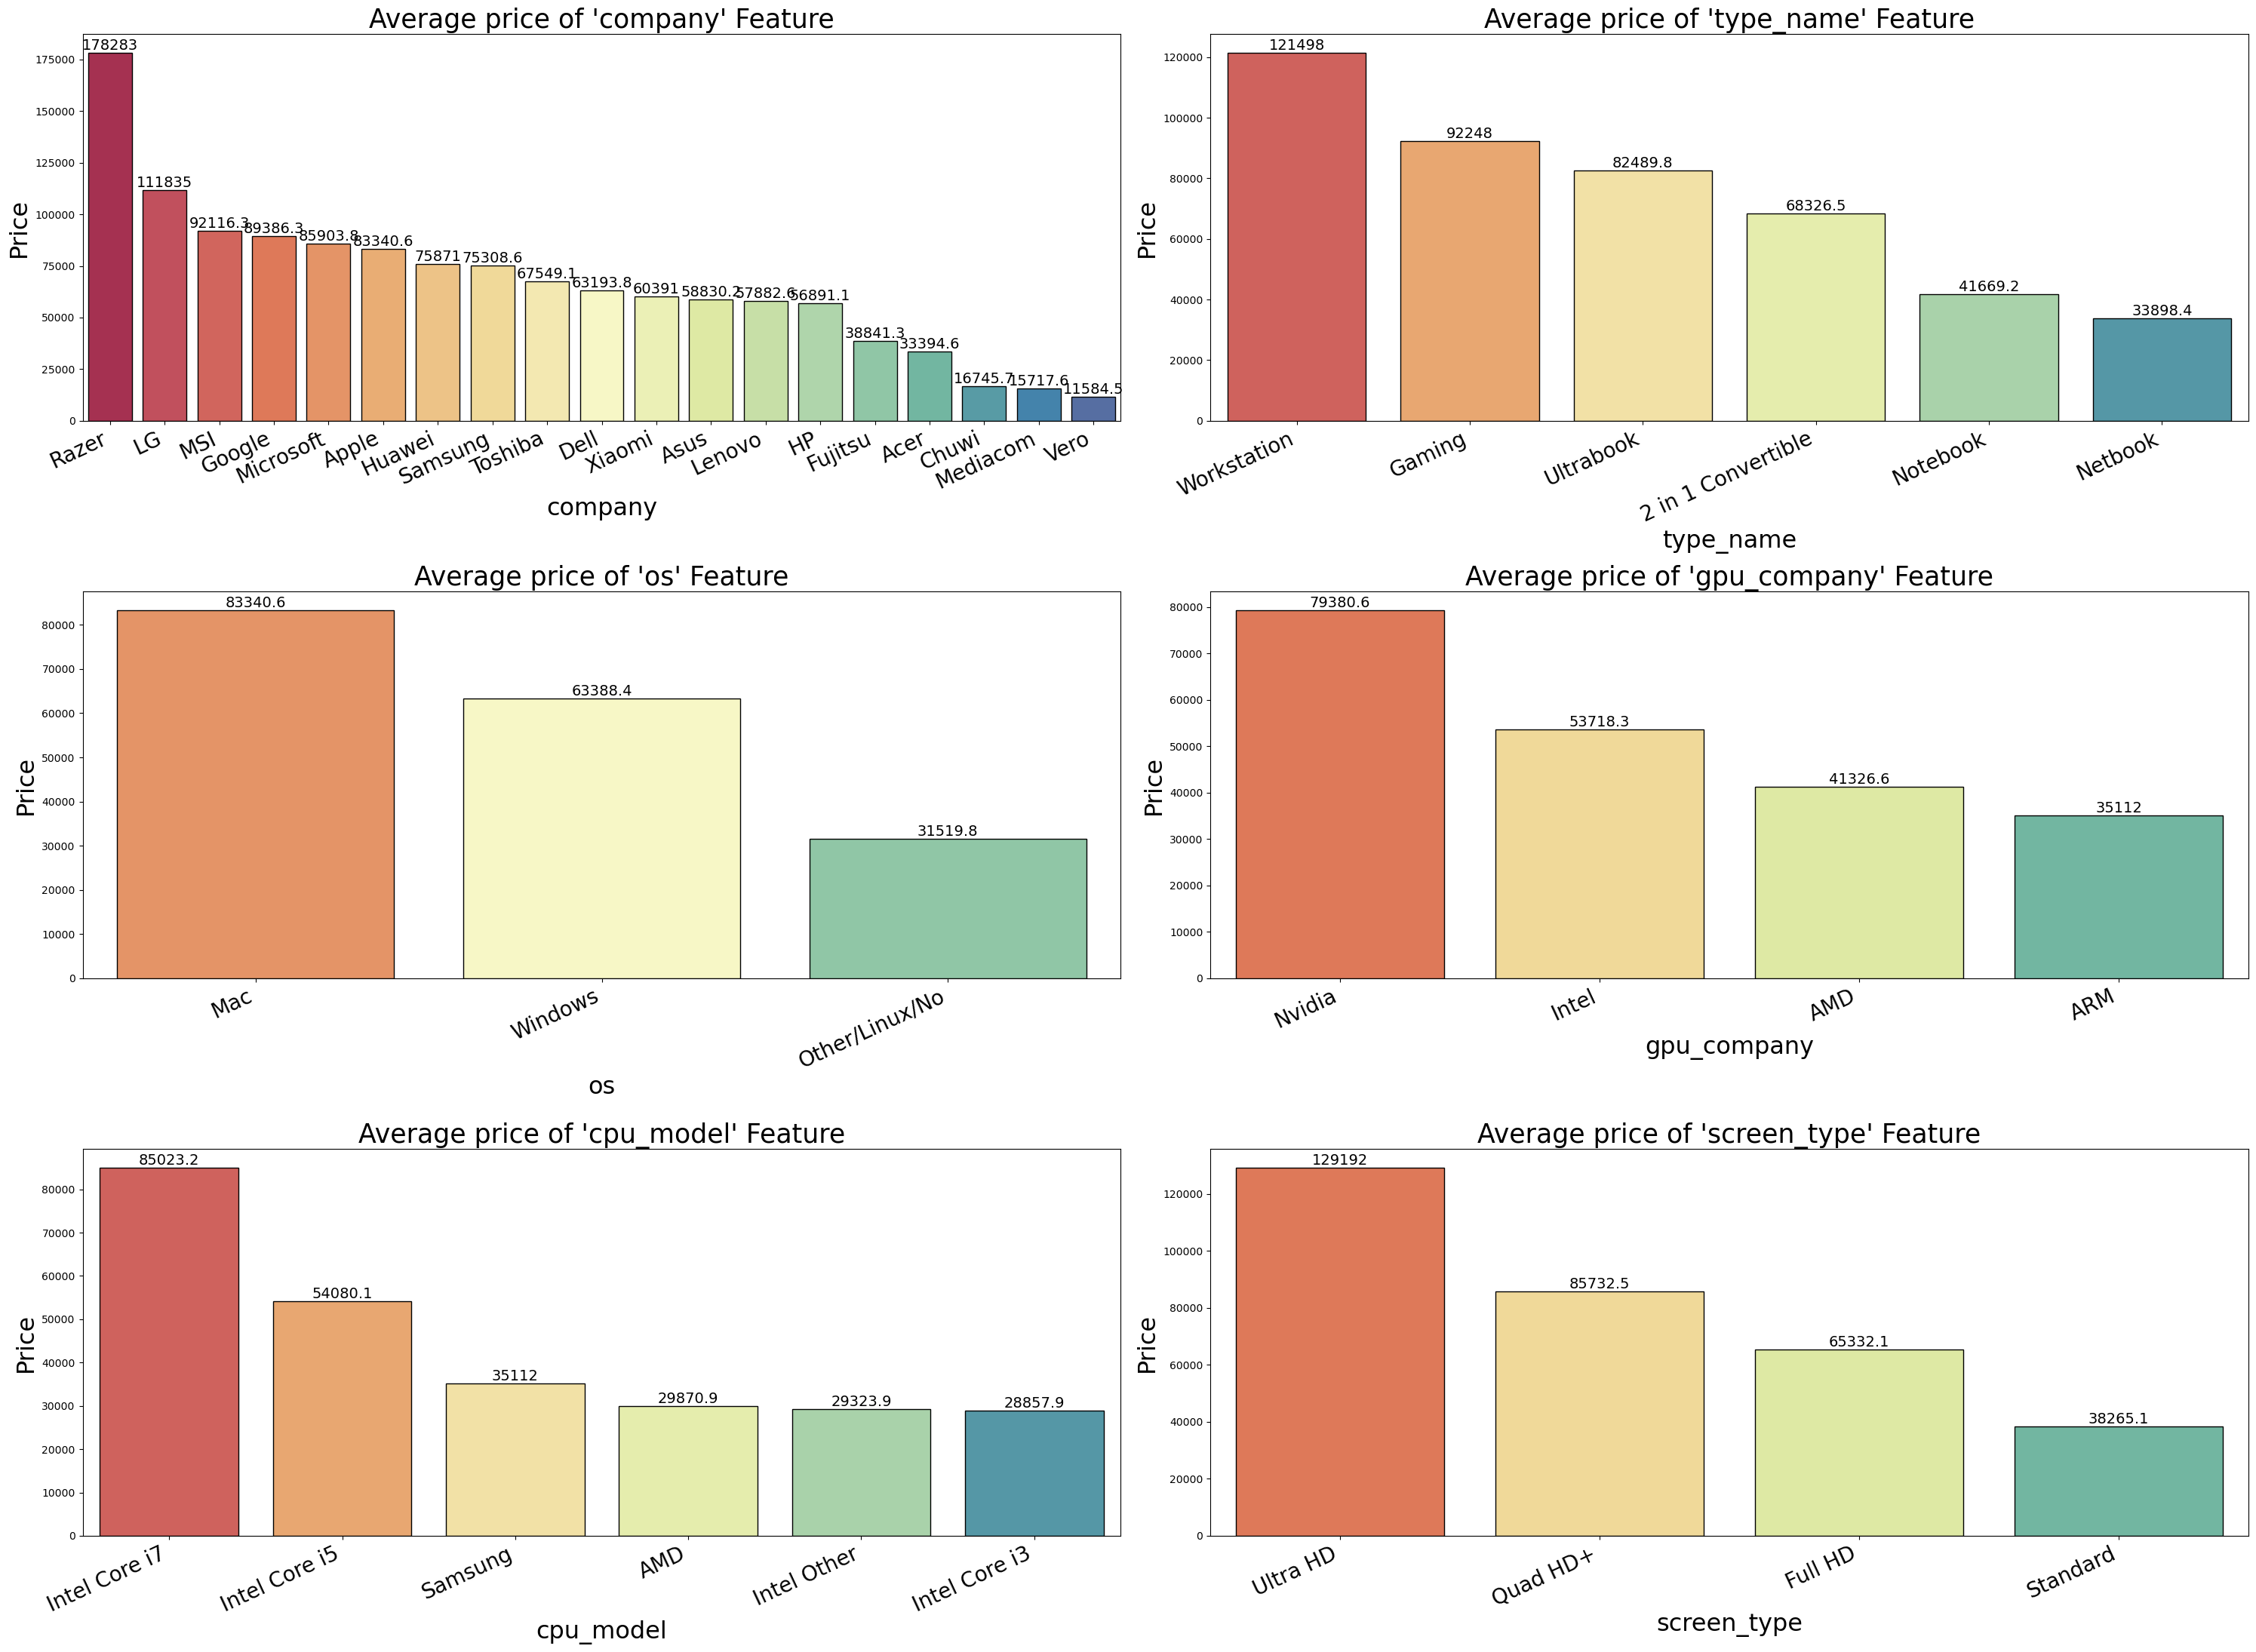

In [35]:
bivariate_plot(data = df, 
               features = df.select_dtypes('object').columns, 
               target = 'price', 
               size_x = 30, 
               size_y = 22)

### **`5.1.a. Observations`**

**`company`**

- **Dell, Lenovo and HP** constitute around **66%** of the total laptops.
- Whereas around **30%** laptops are of **Asus, Acer, MSI, Toshiba, Apple and Samsung**.
- **Remaining 10** company's constitute **4%** of the laptops.
- Considering the average prices, **Razer** & **LG** are at the **high-end**. **MSI, Google, Microsoft, Apple, Huawei & Samsung** on an average cost somewhere between **75000 - 92000**. Whereas **Lenovo, HP, Asus, Acer, Dell, Toshiba** are budget friendly.
- It is evident that the prices depend on the company name. So **Company** is an important feature.

**`type_name`**
- More than **half** of the laptops are **Notebook** (**55.79%** of the total), followed by **Gaming (15.73%)**, **Ultrabook (15%)** and **2 in 1 Convertible** laptops are **9.29%** of the total.
- **Netbook** laptops are the **least** in count (**1.92%**), while **Workstation** constitutes **2.23%** of the total laptops.
- **Workstation** and **Gaming** laptops have **high** end prices, **Ultrabook** and **2 in 1 convertible** laptops have **mid-range** prices. **Notebook** and **Netbook** categories of laptops are **affordable**.
- Since prices of laptops vary depending on the type of the laptop, **type_name** is an important feature.

**`os`**
- **Majority** of laptops have **Windows** operating system (**86.34%**), while only **1.61%** laptops in the data have **Mac OS**.
- As generally seen, **Mac** laptops are the **costliest** with an average price of around **83000**, followed by **Windows** laptops (around **63000**).
- Laptops with other operating systems like **Linux** or with **no** OS are available at **cheap** prices.
- **os** is important feature of a laptop, so we will consider it for our model.

**`gpu_company`**
- Around **55%** of the laptops contain **Intel** GPU and **31%** laptops contain **NVIDIA** GPU. Remaining laptops have AMD GPU and only 1 laptop have ARM GPU.
- Laptops with **NVIDIA** GPU costs around **79000**, while **Intel** GPU laptops cost around **54000** on an average. **AMD** and **ARM** GPU are very **affordable** with average cost around **41000** and **35000** respectively.
- **gpu_company** helps in deciding the prices of laptops, so it is an important feature.

**`cpu_model`**
- Around **41%** of the laptops have **Intel Core i7**, followed by **Intel Core i5 (32.46%)**, **Intel Other (12%)** and **Intel Core i3 (10.44%)**.
- Price changes depending on the cpu model, so it is an important feature for our model.

**`screen_type`**
- About **64.7%** of the laptops have **Full HD** screen, followed by **29.7%** of laptops with **Standard** screen.
- Laptops with **Ultra HD** and **Quad HD+** screens are **rare** in the data.
- **screen_type** feature shows pattern in deciding the prices of the laptops, so it seem to be an important feature.

## **`5.1.b. Categorical Features`**
- `touchscreen`, `ips_panel`, `retina_display`

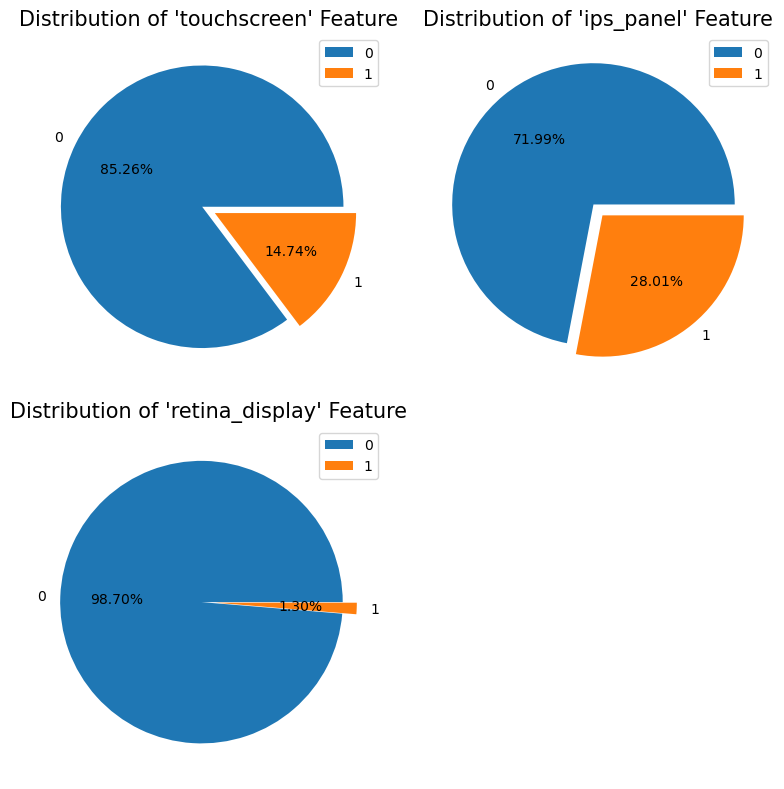

In [36]:
pie_plot(data = df,
         features = ['touchscreen', 'ips_panel', 'retina_display'],
         size_x = 8,
         size_y = 8,
         title_size = 15)

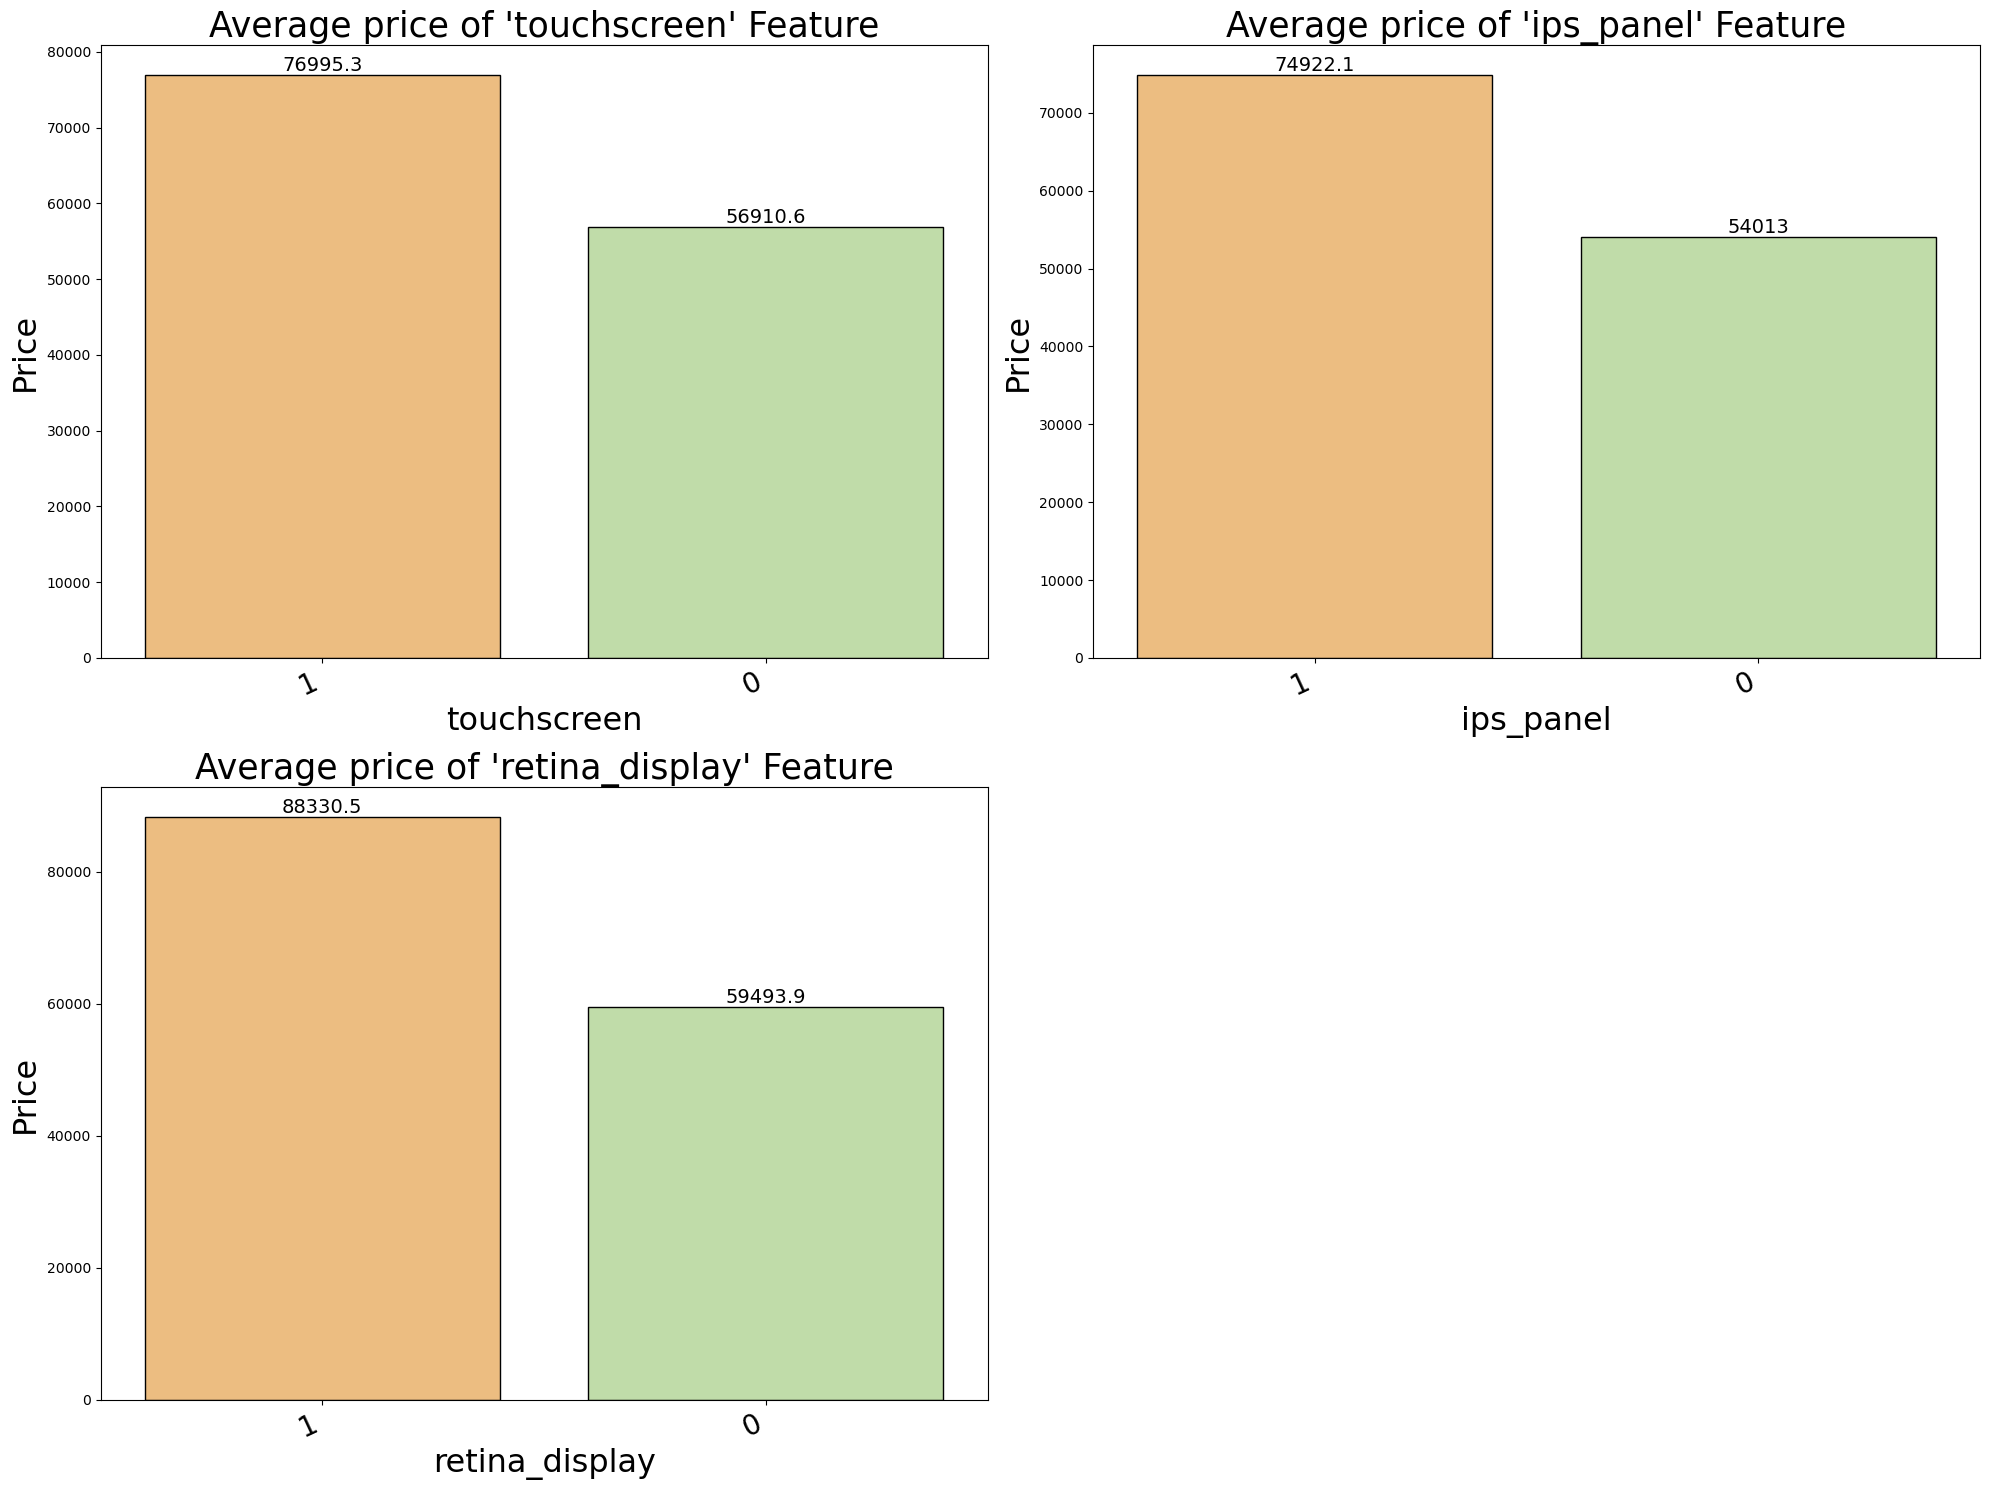

In [37]:
bivariate_plot(data = df, 
               features = ['touchscreen', 'ips_panel', 'retina_display'], 
               target = 'price', 
               size_x = 20, 
               size_y = 15)

### **`5.1.b. Observations`**

**`touchscreen`**
- **85%** of the laptops **do not** have a touchscreen.
- Laptops with touchscreen are **costlier** than laptops with no touchscreen.
- **touchscreen** feature is important.

**`ips_panel`**
- **72%** of the laptops **do not** have IPS panel.
- **ips_panel** is an important feature as laptops **with** IPS panel are **costlier** than those with no IPS panel.

**`retina_display`**
- More than **98%** of the laptops **do not** have Retina Display.
- The **No** category dominates and it will impact the effect of **Yes** category and therefore the column will not add any value to the model.
- So **retina_display** feature must be dropped.

## **`5.2. Discrete Numerical Features`**

In [38]:
numerical_features = (
    df
    .select_dtypes('number')
    .columns
    .to_list()[3:]
)
print(numerical_features)

['inches', 'ppi', 'ssd', 'hdd', 'flash storage', 'hybrid', 'ram', 'weight', 'cpu_freq', 'price']


In [39]:
discrete_features = ['inches', 'ssd', 'hdd', 'flash storage', 'hybrid', 'ram', 'cpu_freq']
num_features = ['weight', 'ppi', 'price']

### **`5.2.1. Summary`**

In [40]:
(
    df
    [numerical_features]
    .describe()
    .T
)

,count,mean,std,min,25%,50%,75%,max
inches,1303.0,15.017191,1.426304,10.100000,14.000000,15.600000,15.600000,18.400000
ppi,1303.0,146.635987,43.121345,90.583402,127.335675,141.211998,157.350512,352.465147
ssd,1303.0,182.848810,185.927957,0.000000,0.000000,256.000000,256.000000,1024.000000
hdd,1303.0,421.691481,526.344470,0.000000,0.000000,0.000000,1024.000000,2048.000000
flash storage,1303.0,4.555641,30.274090,0.000000,0.000000,0.000000,0.000000,512.000000
hybrid,1303.0,9.034536,94.738890,0.000000,0.000000,0.000000,0.000000,1024.000000
ram,1303.0,8.382195,5.084665,2.000000,4.000000,8.000000,8.000000,64.000000
weight,1303.0,2.038734,0.665475,0.690000,1.500000,2.040000,2.300000,4.700000
cpu_freq,1303.0,2.298772,0.506340,0.900000,2.000000,2.500000,2.700000,3.600000
price,1303.0,59870.099002,37243.221564,9271.000000,31915.000000,52055.000000,79274.000000,324955.000000


In [41]:
(
    df[discrete_features]
    .assign(
        **{
            col: df[col].astype('object')
            for col in discrete_features
        }
    )
    .describe()
    .T
    .rename_axis(index = 'feature')
)

,count,unique,top,freq
feature,,,,
inches,1303.0,18.0,15.6,665.0
ssd,1303.0,11.0,256.0,501.0
hdd,1303.0,6.0,0.0,727.0
flash storage,1303.0,7.0,0.0,1228.0
hybrid,1303.0,3.0,0.0,1291.0
ram,1303.0,9.0,8.0,619.0
cpu_freq,1303.0,25.0,2.5,293.0


### **`5.2.2. Uni-Variate Analysis`**

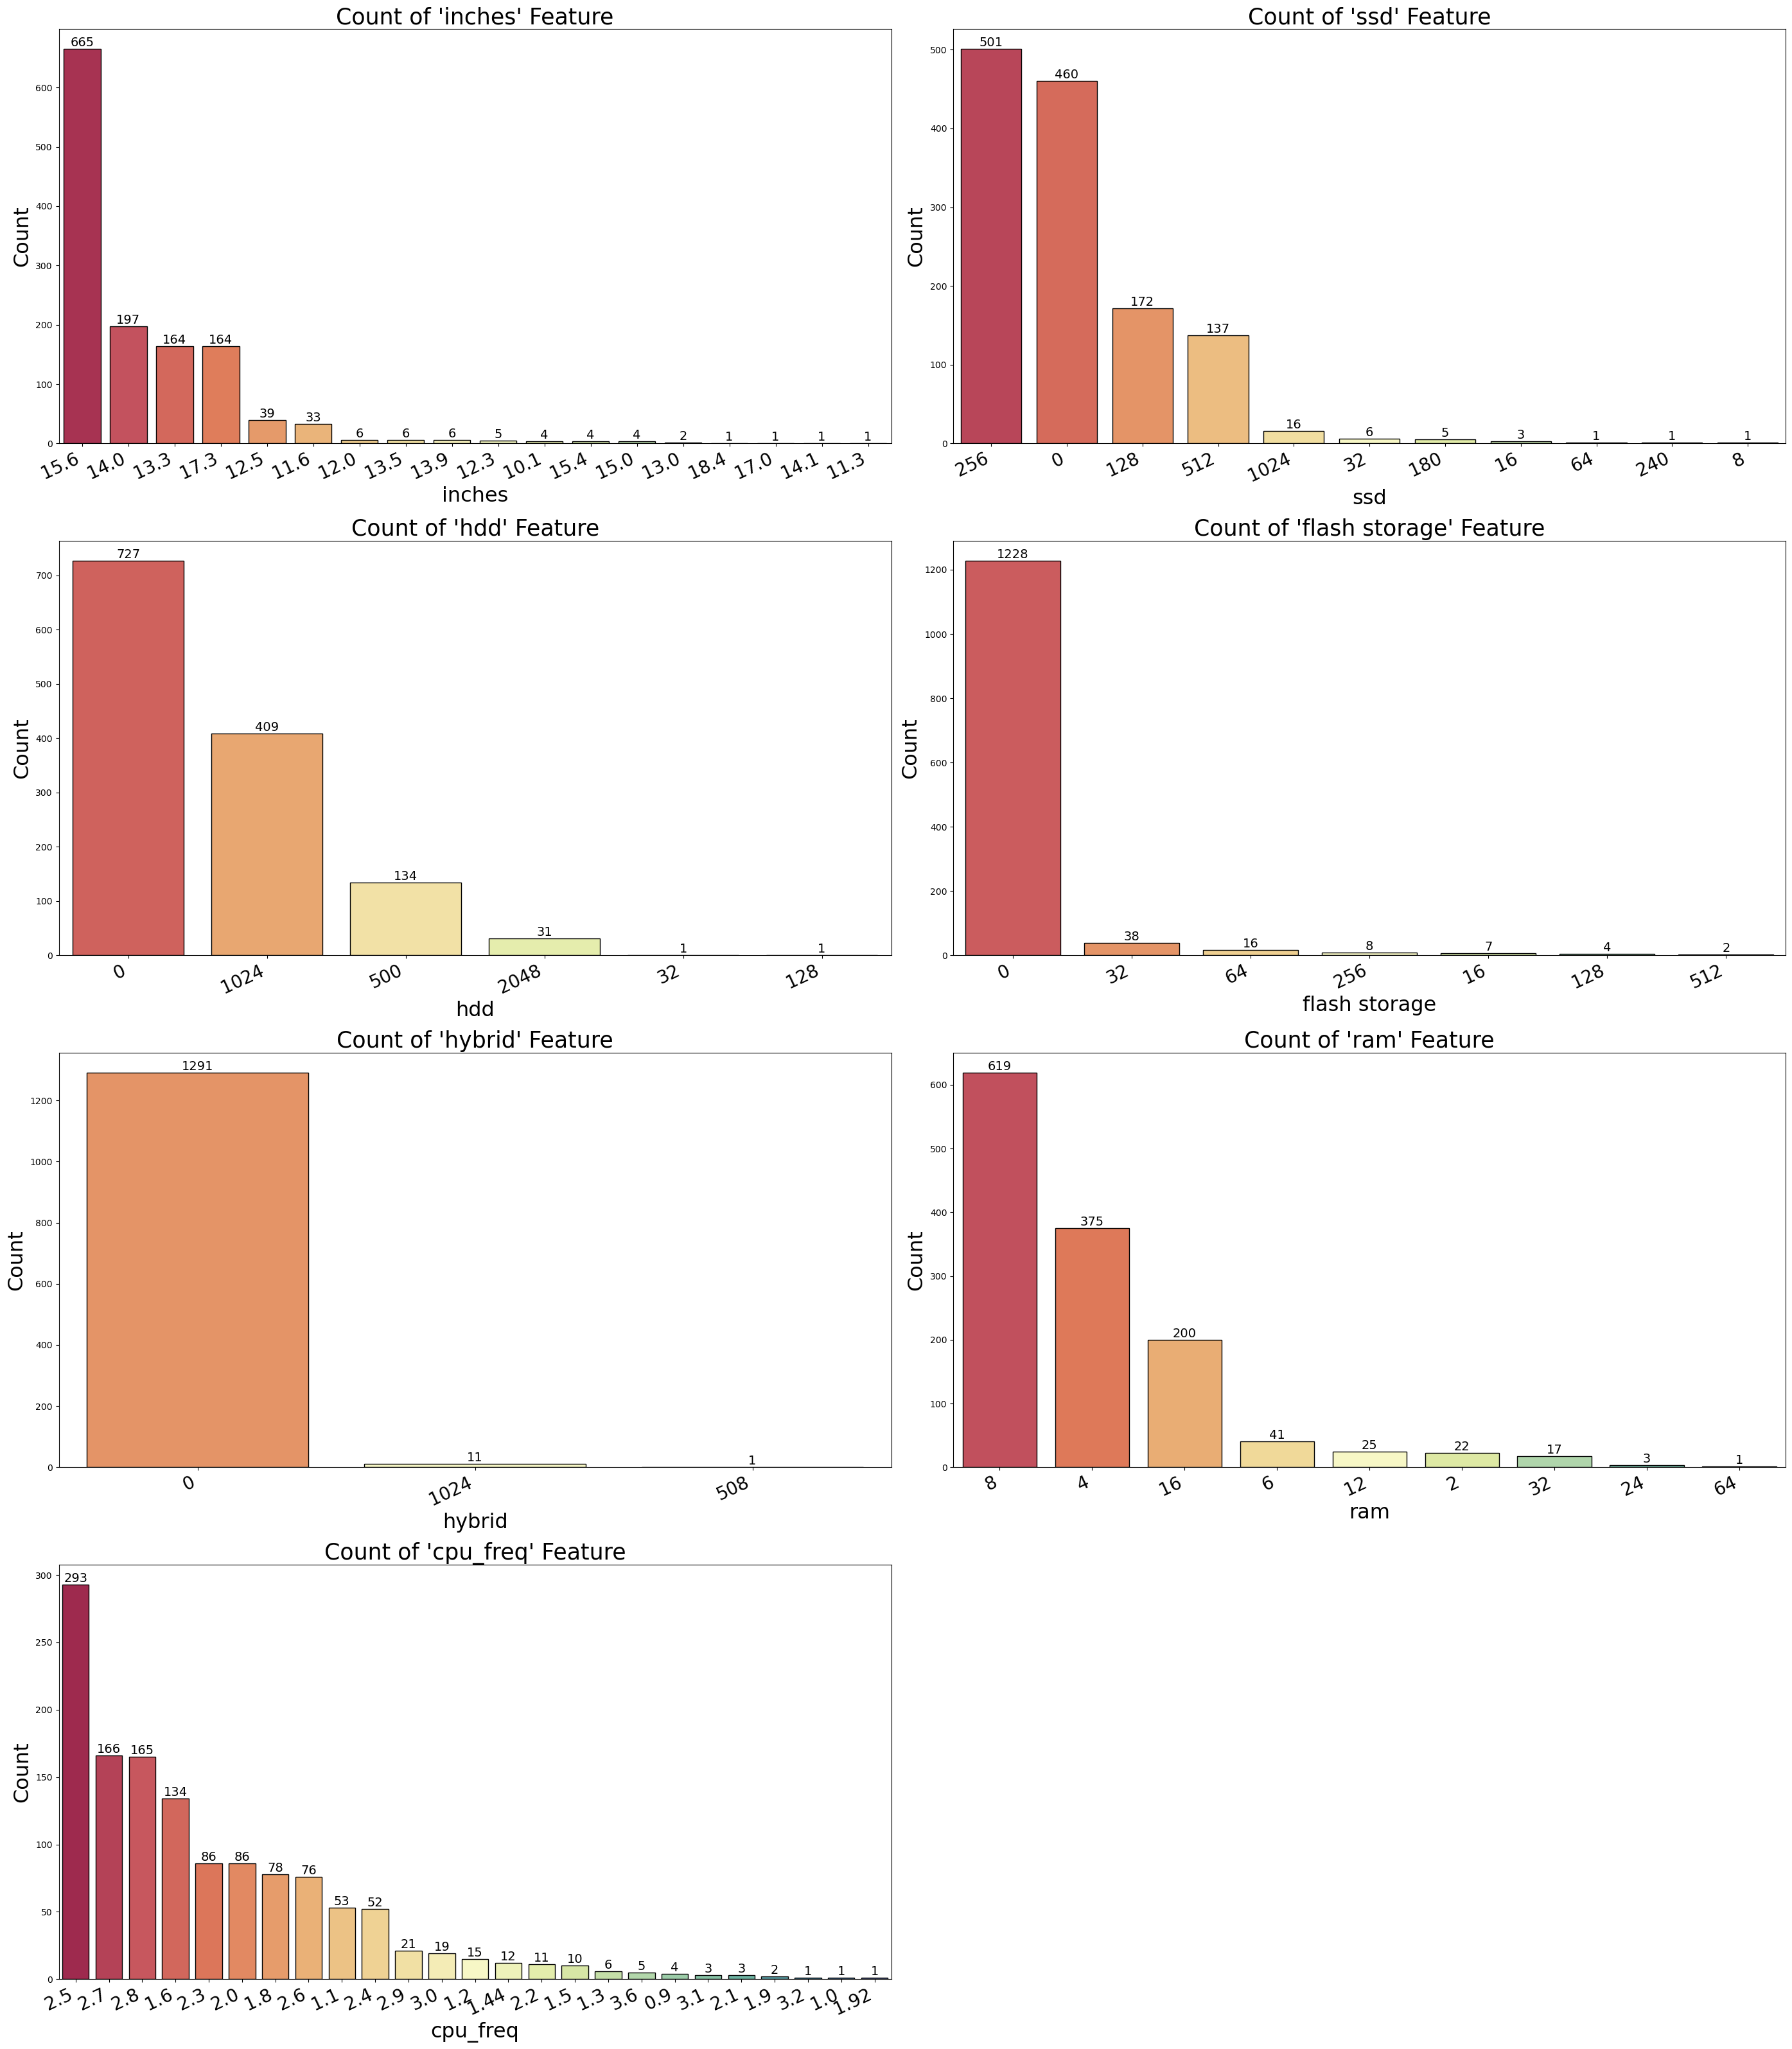

In [42]:
count_plot(data = df, 
           features = discrete_features, 
           size_x = 28, 
           size_y = 32)

### **`5.2.3. Bi-Variate Analysis`**

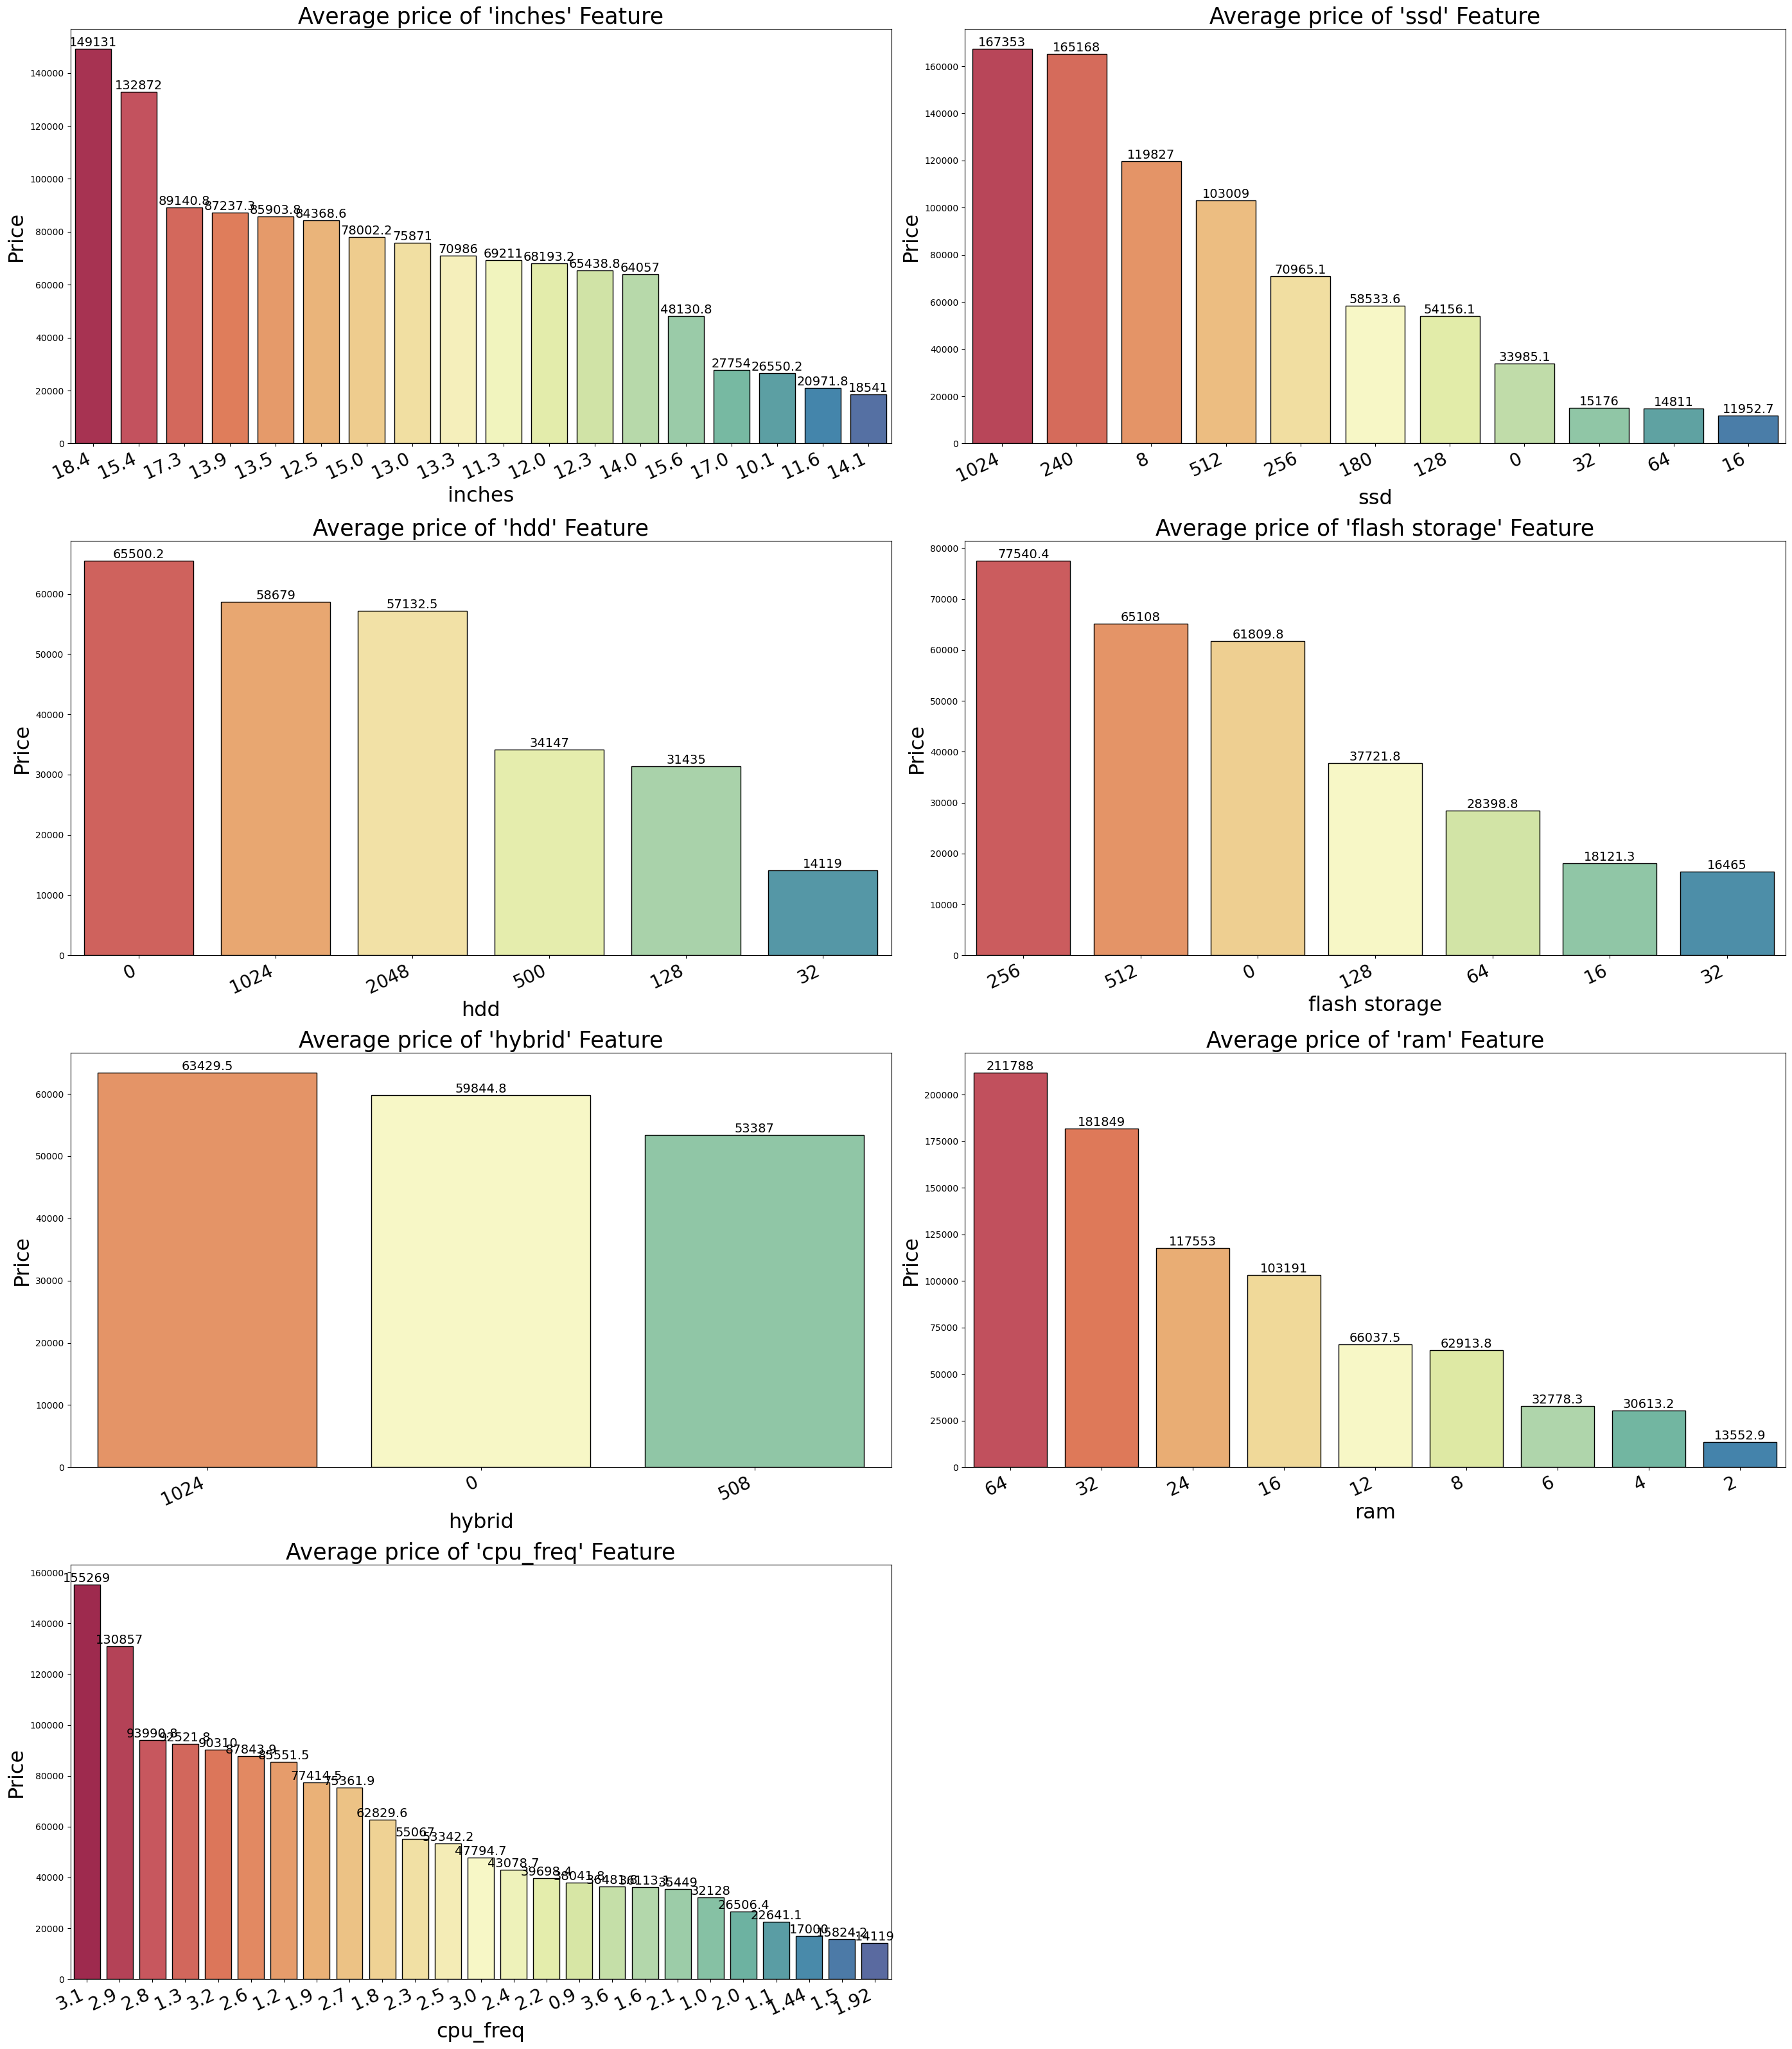

In [43]:
bivariate_plot(data = df, 
               features = discrete_features, 
               target = 'price', 
               size_x = 28, 
               size_y = 32)

### **`5.2. Observations`**

**`inches`**
- **15.6 inch** laptops are **majority** in number.
- Other frequently occuring laptop sizes are 14, 17.3 and 13.3 inches.
- It is to note that there is **only 1** laptop with screen size of **18.4 inches** that costs the **highest (149000)**.
- There are **4** laptops with screen size of **15.4 inches** and are **second highest** in terms of price (around **133000**).
- The **most** frequent **15.6 inch** laptops cost around **48000** on an average.
- The pattern doesn't necessarily define the prices. Since we have created new feature **ppi** using this feature we will **drop** this feature.

**`ram`**
- **8GB RAM** laptops are the **highest** in count (**48%**), followed by **4GB (29%)** and **16GB (16%)**.
- Other **rarely** occuring categories are **2GB, 6GB, 12Gb, 24GB, 32GB** and **64GB RAM** laptops.
- Price is **highly correlated** to **RAM storage**, as price increases with increase in RAM size.
- So it is **very important** feature that will help our model in prediction of price.

**`cpu_freq`**
- Though there is variation in prices of laptop based on the CPU Frequency, the pattern is not easy to interprete directly.
- So let the model decide about the **cpu_freq** feature.

## **`5.3. Numerical Features`**

### **`5.3.1. Summary`**

In [44]:
df[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
weight,1303.0,2.038734,0.665475,0.690000,1.500000,2.040000,2.300000,4.700000
ppi,1303.0,146.635987,43.121345,90.583402,127.335675,141.211998,157.350512,352.465147
price,1303.0,59870.099002,37243.221564,9271.000000,31915.000000,52055.000000,79274.000000,324955.000000


### **`5.3.2. Uni-Variate Analysis`**

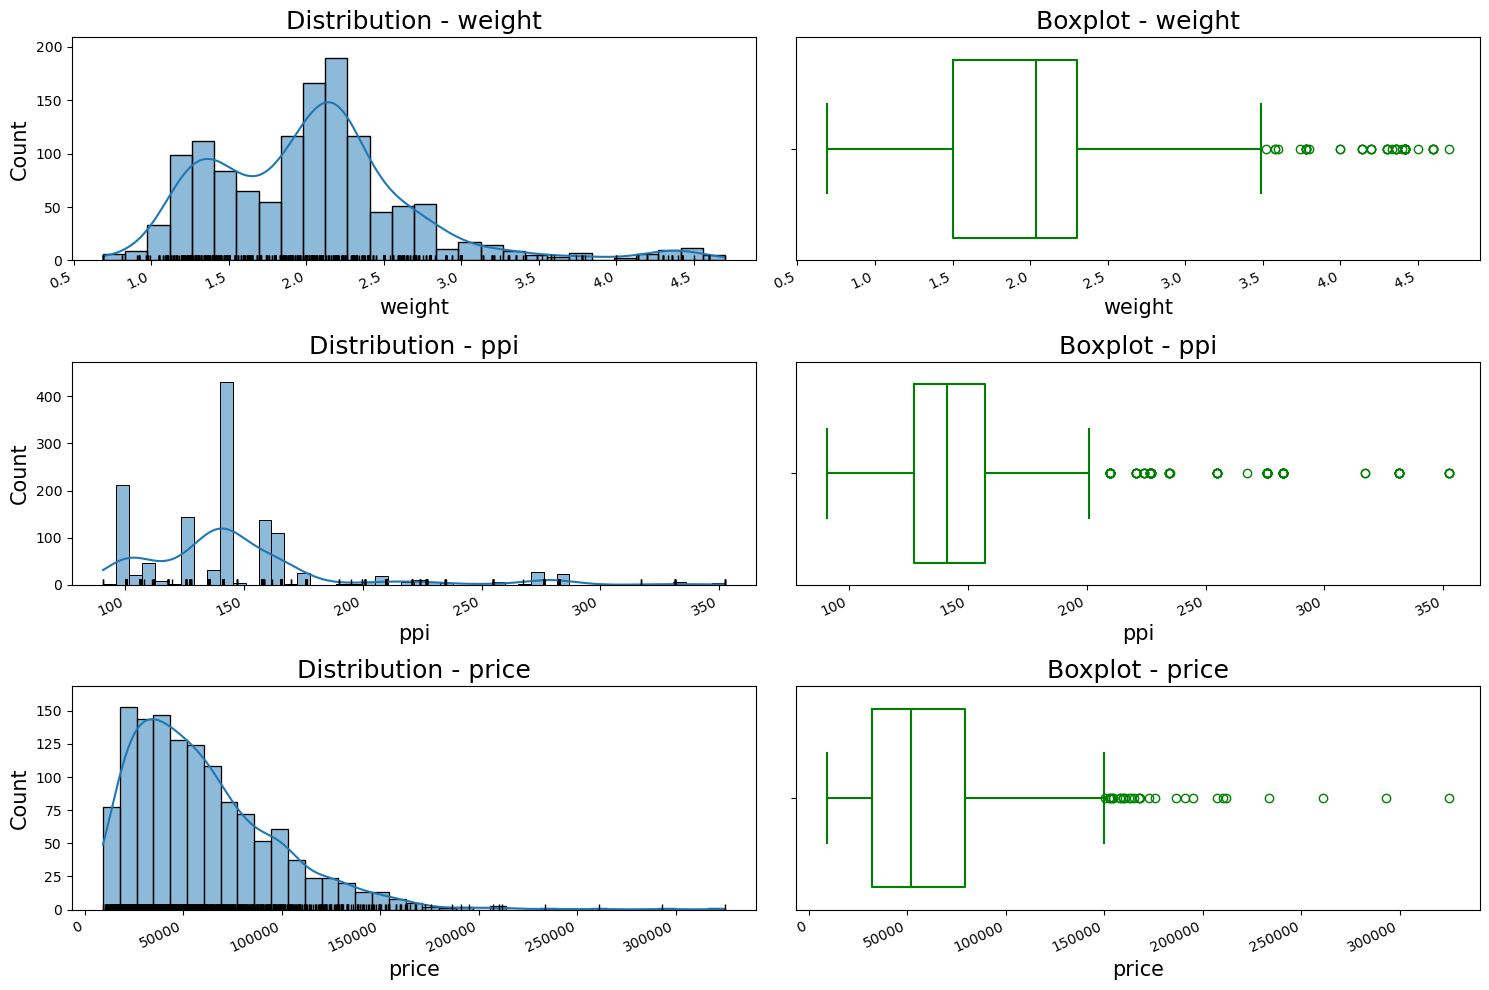

In [45]:
plt.figure(figsize = (15,10))
plt.subplot(3,2,1)
hist_plot(data = df, x = 'weight')

plt.subplot(3,2,2)
box_plot(data = df, x = 'weight')

plt.subplot(3,2,3)
hist_plot(data = df, x = 'ppi')

plt.subplot(3,2,4)
box_plot(data = df, x = 'ppi')

plt.subplot(3,2,5)
hist_plot(data = df, x = 'price')

plt.subplot(3,2,6)
box_plot(data = df, x = 'price')

plt.tight_layout()
plt.show()

### **`5.3.3. Bi-Variate Analysis`**

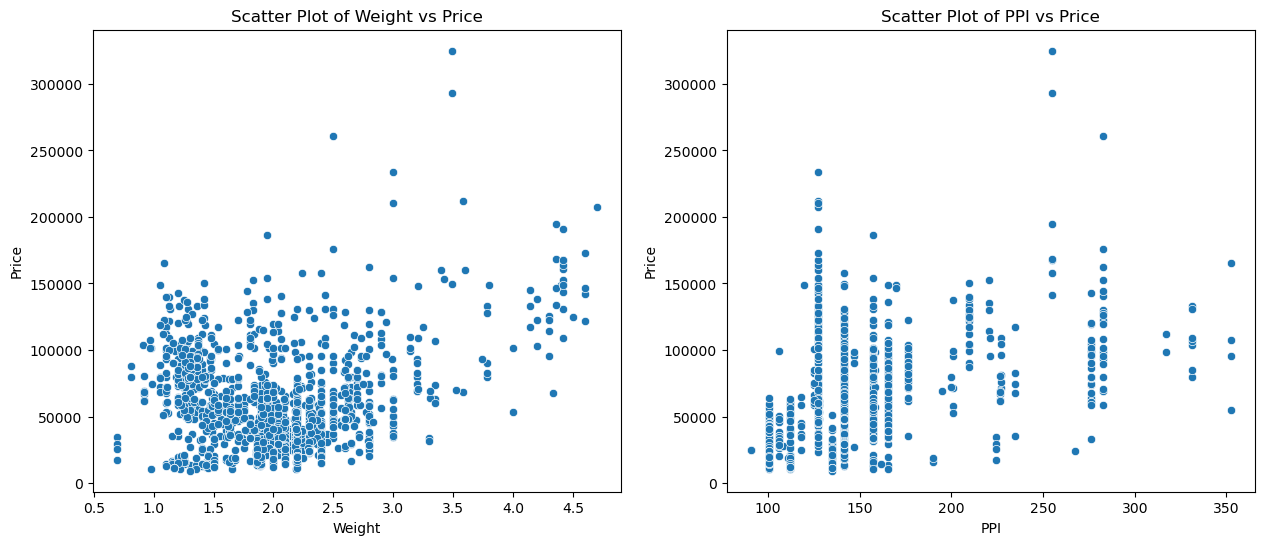

In [46]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = 'weight', y = 'price')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Scatter Plot of Weight vs Price')

plt.subplot(1,2,2)
sns.scatterplot(data = df, x = 'ppi', y = 'price')
plt.xlabel('PPI')
plt.ylabel('Price')
plt.title('Scatter Plot of PPI vs Price')
plt.show()

### **`5.3.4. Multi-Variate Analysis`**

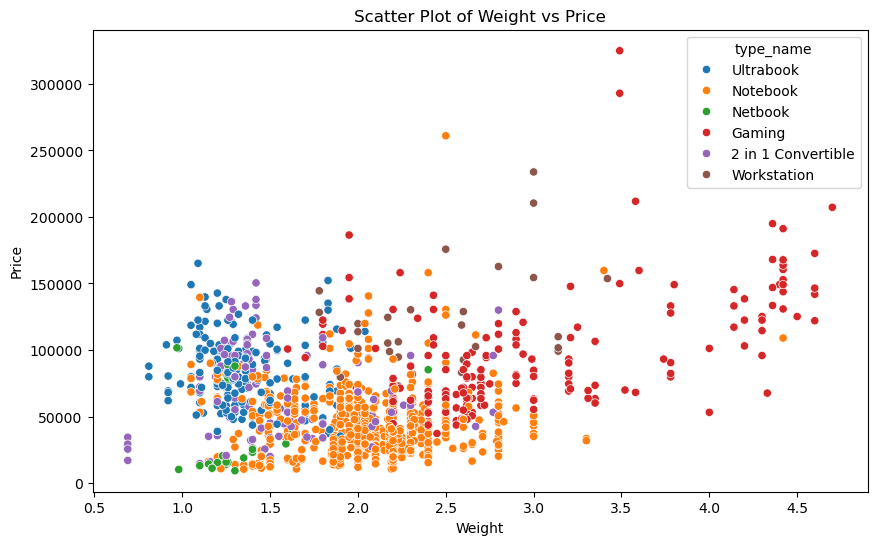

In [47]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'weight', y = 'price', hue = 'type_name')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Scatter Plot of Weight vs Price')
plt.show()

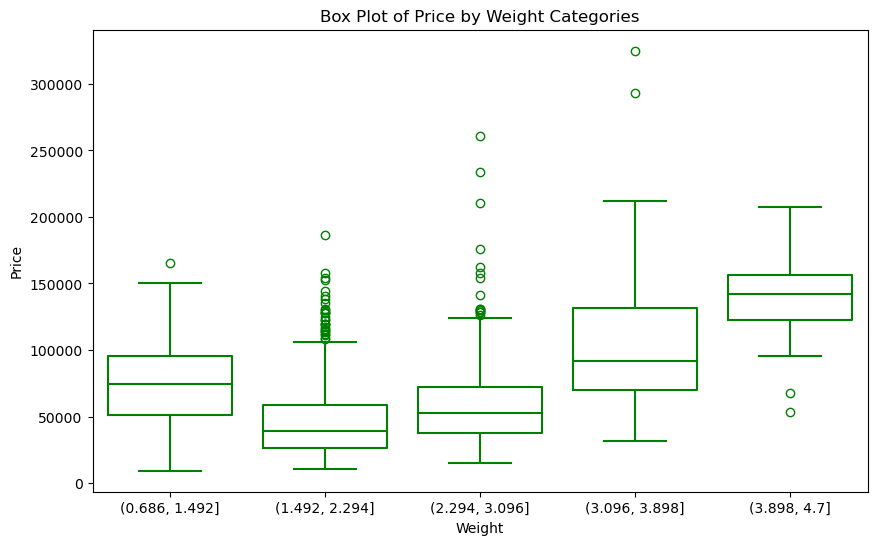

In [48]:
df_weight_bin = (
    df
    .assign(
        weight_bin = lambda df_: pd.cut(df_['weight'], bins = 5)
    )
)
plt.figure(figsize = (10,6))
sns.boxplot(data = df_weight_bin, x = 'weight_bin', y = 'price',
            fill = False, color = 'green')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Box Plot of Price by Weight Categories')
plt.show()

### **`5.3. Observations`**

**`weight`**
- **Lightest** laptop weighs **690 grams** and **heaviest** laptop weighs **4.7kg**.
- **Half** of the laptops weigh in the range of **1.5kg to 2.3kg**.
- Whereas **half** of the total laptops are up to **2kg** in weight.
- **25%** of the laptops weigh in the range of **2kg** to **2.3kg**.
- There are **outliers** in the **Weight** column which should be handled.
- **Light** weight laptops of upto **1.5kg** (mostly Ulatrabook and 2 in 1 Convertible) are **high** in price.
- However, price increases almost **linearly** with increases in the weight of the laptop. So there is a **weak positive correlation** between **weight** and **price** column.
- The **heavy** laptops are **mostly Gaming** and **Workstation** laptops.

**`price`**
- Prices of laptops ranges from **9271 to 324955**.
- **Half** of the laptops cost of upto **52000** and **75%** of laptops cost of upto **79000**. With **mean** price of **59870**, it it evident that there are **outliers** in the **price** feature, which needs to be handled.
- As the **price** column is **right-skewed**, we should apply a **log transformation** to make it normally distributed.

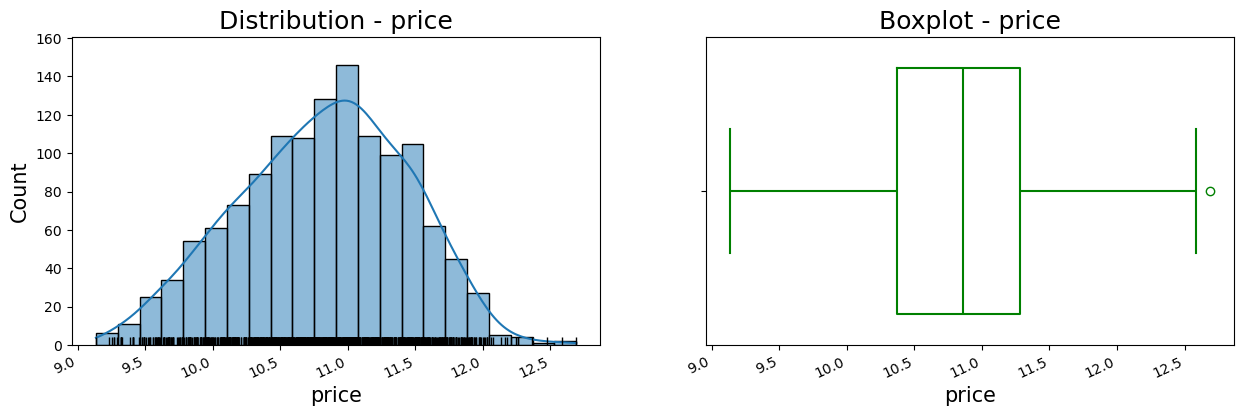

In [49]:
p = (
    df
    .assign(
        price = lambda df_: np.log1p(df_['price'])
    )
)

plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
hist_plot(data = p, x = 'price')

plt.subplot(1,2,2)
box_plot(data = p, x = 'price')

plt.show()

# **`6. Outlier Treatment`**
### **`6.1. Handling outliers of 'weight' column using IQR Proximity Capping method`**

In [50]:
def cap_outliers(ser):
    q1 = ser.quantile(0.25)
    q2 = ser.quantile(0.50)
    q3 = ser.quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)

    ser1 = np.where(ser <= lower_limit, lower_limit,
                  np.where(ser >= upper_limit, upper_limit, ser)
                  )
    return ser1

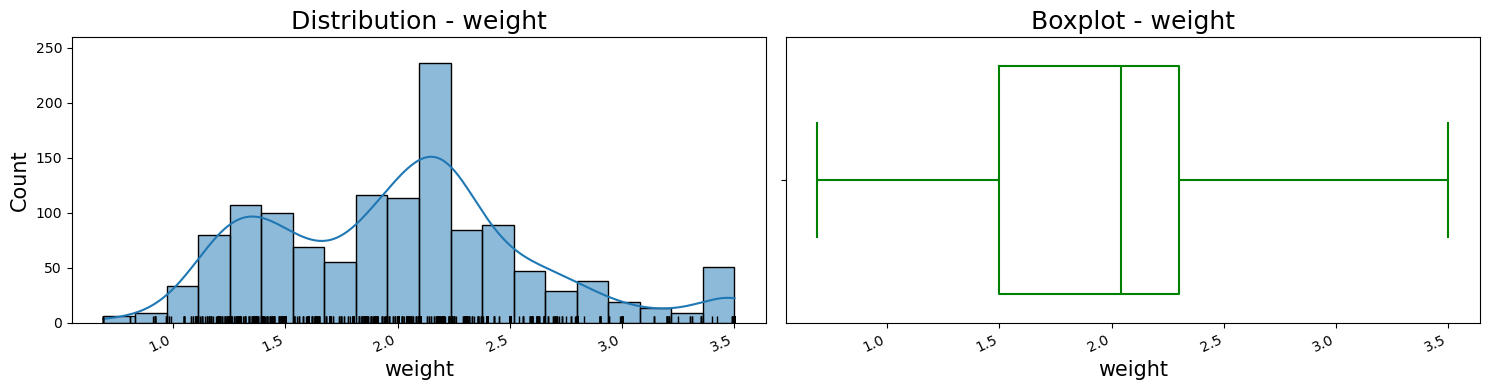

In [51]:
w = (
    df
    .assign(
        weight = lambda df_: cap_outliers(df_['weight'])
    )
)

plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
hist_plot(data = w, x = 'weight')

plt.subplot(1,2,2)
box_plot(data = w, x = 'weight')

plt.tight_layout()
plt.show()

# **`7. Transformed Data`**

In [52]:
def transform_data(df):
    return(
        df
        .assign(
            price = lambda df_: np.log1p(df_['price']),
            weight = lambda df_: df_['weight'].pipe(cap_outliers),
            ppi = lambda df_: df_['ppi'].pipe(cap_outliers)
        )
        .rename({'flash storage': 'flash_storage'}, axis = 1)
        .drop(columns = ['inches', 'retina_display'])
    )

In [53]:
df_transformed = transform_data(df)
df_transformed.head(2)

,company,type_name,os,gpu_company,cpu_model,screen_type,touchscreen,ips_panel,ppi,ssd,hdd,flash_storage,hybrid,ram,weight,cpu_freq,price
0,Apple,Ultrabook,Mac,Intel,Intel Core i5,Standard,0,1,202.372769,128,0,0,0,8,1.37,2.3,11.175773
1,Apple,Ultrabook,Mac,Intel,Intel Core i5,Standard,0,0,127.677940,0,0,128,0,8,1.34,1.8,10.776808


In [54]:
df_transformed.duplicated().sum()

30

In [55]:
df_final = df_transformed.drop_duplicates(keep = 'first')

In [56]:
df_final.duplicated().sum()

0

In [57]:
df_final.sample()

,company,type_name,os,gpu_company,cpu_model,screen_type,touchscreen,ips_panel,ppi,ssd,hdd,flash_storage,hybrid,ram,weight,cpu_freq,price
691,Lenovo,Notebook,Windows,Intel,Intel Core i5,Full HD,0,0,157.350512,256,0,0,0,4,1.7,2.5,10.525246


In [58]:
df_final.to_csv(r'C:\Users\anike\DATA SCIENCE AND AI\ML Projects\smartbuy-predictive-analytics-for-laptop-prices\data\processed\df.csv',
                index = False)

In [59]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        1273 non-null   object 
 1   type_name      1273 non-null   object 
 2   os             1273 non-null   object 
 3   gpu_company    1273 non-null   object 
 4   cpu_model      1273 non-null   object 
 5   screen_type    1273 non-null   object 
 6   touchscreen    1273 non-null   int32  
 7   ips_panel      1273 non-null   int32  
 8   ppi            1273 non-null   float64
 9   ssd            1273 non-null   int64  
 10  hdd            1273 non-null   int64  
 11  flash_storage  1273 non-null   int64  
 12  hybrid         1273 non-null   int64  
 13  ram            1273 non-null   int32  
 14  weight         1273 non-null   float64
 15  cpu_freq       1273 non-null   float64
 16  price          1273 non-null   float64
dtypes: float64(4), int32(3), int64(4), object(6)
memory usage

# **`8. Correlation Analysis`**
## **`8.1. Correlation Analysis - Numerical Features`**

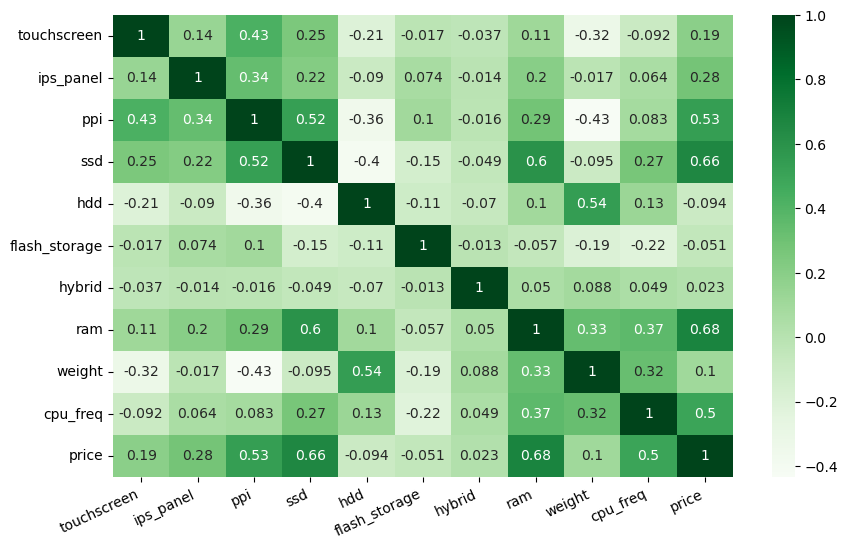

In [60]:
plt.figure(figsize = (10,6))
sns.heatmap(df_final.corr(numeric_only = True), annot = True, cmap = 'Greens')
plt.xticks(ha = 'right', rotation = 25)
plt.show()

## **`8.2. Correlation of Numeric Features with the Target Feature`**

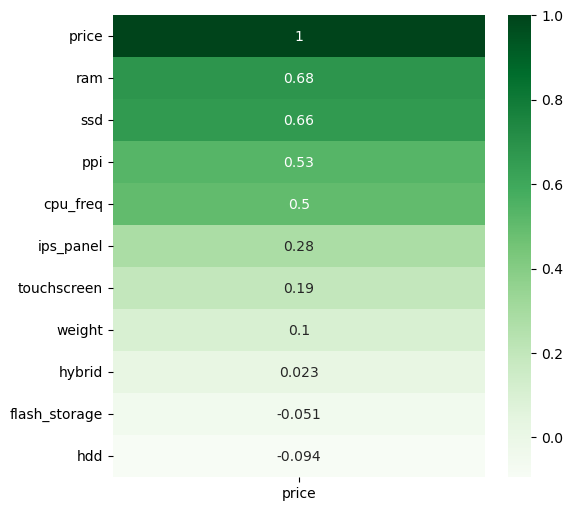

In [61]:
plt.figure(figsize = (6,6))
(
   sns.heatmap(df_final.corr(numeric_only = True)
               [['price']].sort_values('price', ascending = False), 
               annot = True, cmap = 'Greens')
)
plt.show()

### **`8.2. Observations`**
- **ram**, **ssd**, **ppi** and **cpu_freq** are **moderately** correlated with **price**.

# **`9. Data Preparation`**
## **`9.1. Separating Independent Variables and Dependent Variable`**

In [62]:
X = df_final.drop(columns = ['price'])
y = df_final[['price']].copy()

print(f"Shape of X: {X.shape}\n")
print(f"Shape of y: {y.shape}")

Shape of X: (1273, 16)

Shape of y: (1273, 1)


## **`9.2. Splitting Data into Train, Validation and Test Sets`**

In [63]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 1)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}\n")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1018, 16)
X_val shape: (127, 16)
X_test shape: (128, 16)

y_train shape: (1018, 1)
y_val shape: (127, 1)
y_test shape: (128, 1)


In [64]:
X_train.sample(1)

,company,type_name,os,gpu_company,cpu_model,screen_type,touchscreen,ips_panel,ppi,ssd,hdd,flash_storage,hybrid,ram,weight,cpu_freq
742,Toshiba,Notebook,Windows,Intel,Intel Core i5,Full HD,1,1,157.350512,256,0,0,0,8,1.25,2.5


In [65]:
X_val.sample(1)

,company,type_name,os,gpu_company,cpu_model,screen_type,touchscreen,ips_panel,ppi,ssd,hdd,flash_storage,hybrid,ram,weight,cpu_freq
941,Asus,Notebook,Windows,Nvidia,Intel Other,Standard,0,0,106.113062,0,1024,0,0,4,2.8,1.6


In [66]:
X_test.sample(1)

,company,type_name,os,gpu_company,cpu_model,screen_type,touchscreen,ips_panel,ppi,ssd,hdd,flash_storage,hybrid,ram,weight,cpu_freq
190,Lenovo,2 in 1 Convertible,Windows,Intel,Intel Core i7,Standard,1,0,202.372769,1024,0,0,0,16,1.42,2.7


# **`10. Data Preprocessing`**
- Scaling Numerical Features - **Min Max Scaling**
- Encoding Categorical Features - **One Hot Encoding**

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company        1273 non-null   object 
 1   type_name      1273 non-null   object 
 2   os             1273 non-null   object 
 3   gpu_company    1273 non-null   object 
 4   cpu_model      1273 non-null   object 
 5   screen_type    1273 non-null   object 
 6   touchscreen    1273 non-null   int32  
 7   ips_panel      1273 non-null   int32  
 8   ppi            1273 non-null   float64
 9   ssd            1273 non-null   int64  
 10  hdd            1273 non-null   int64  
 11  flash_storage  1273 non-null   int64  
 12  hybrid         1273 non-null   int64  
 13  ram            1273 non-null   int32  
 14  weight         1273 non-null   float64
 15  cpu_freq       1273 non-null   float64
dtypes: float64(3), int32(3), int64(4), object(6)
memory usage: 154.2+ KB


In [68]:
preprocessor = ColumnTransformer(transformers = [
    ('categorical', OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown = 'ignore'), [0,1,2,3,4,5]),
    ('numerical', MinMaxScaler(), [6,7,8,9,10,11,12,13,14,15])
    ],
    remainder = 'passthrough'
)

X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(X_test)
X_temp = preprocessor.transform(X_temp)

In [69]:
nominal_col = preprocessor.transformers_[0][1].get_feature_names_out()
numerical_col = preprocessor.transformers_[1][1].get_feature_names_out()
cols = list(nominal_col) + list(numerical_col)

In [70]:
X_train_df = pd.DataFrame(data = X_train, columns = cols)
X_val_df = pd.DataFrame(data = X_val, columns = cols)
X_test_df = pd.DataFrame(data = X_test, columns = cols)
X_temp_df = pd.DataFrame(data = X_temp, columns = cols)

In [71]:
X_train_df.head(2)

,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Google,company_HP,company_Huawei,company_LG,company_Lenovo,company_MSI,company_Mediacom,company_Microsoft,company_Razer,company_Samsung,company_Toshiba,company_Vero,company_Xiaomi,type_name_Gaming,type_name_Netbook,type_name_Notebook,type_name_Ultrabook,type_name_Workstation,os_Other/Linux/No,os_Windows,gpu_company_ARM,gpu_company_Intel,gpu_company_Nvidia,cpu_model_Intel Core i3,cpu_model_Intel Core i5,cpu_model_Intel Core i7,cpu_model_Intel Other,cpu_model_Samsung,screen_type_Quad HD+,screen_type_Standard,screen_type_Ultra HD,touchscreen,ips_panel,ppi,ssd,hdd,flash_storage,hybrid,ram,weight,cpu_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.597258,0.250,0.0,0.0,0.0,0.2,0.359431,0.629630
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.452893,0.125,0.5,0.0,0.0,0.2,0.715302,0.703704


In [72]:
X_test_df.head(2)

,company_Apple,company_Asus,company_Chuwi,company_Dell,company_Google,company_HP,company_Huawei,company_LG,company_Lenovo,company_MSI,company_Mediacom,company_Microsoft,company_Razer,company_Samsung,company_Toshiba,company_Vero,company_Xiaomi,type_name_Gaming,type_name_Netbook,type_name_Notebook,type_name_Ultrabook,type_name_Workstation,os_Other/Linux/No,os_Windows,gpu_company_ARM,gpu_company_Intel,gpu_company_Nvidia,cpu_model_Intel Core i3,cpu_model_Intel Core i5,cpu_model_Intel Core i7,cpu_model_Intel Other,cpu_model_Samsung,screen_type_Quad HD+,screen_type_Standard,screen_type_Ultra HD,touchscreen,ips_panel,ppi,ssd,hdd,flash_storage,hybrid,ram,weight,cpu_freq
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.5,0.0,0.466667,0.480427,0.481481
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.452893,0.5,0.0,0.0,0.0,0.200000,0.466192,0.703704


In [73]:
print(X_train_df.shape)
print(X_val_df.shape)
print(X_test_df.shape)

(1018, 45)
(127, 45)
(128, 45)


# **`11. Model Development`**

## **`11.1. Model Selection`**

### **`11.1.1. K Fold Cross Validation`**

In [74]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

cv = KFold(n_splits=5, shuffle=True, random_state=28)
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = np.mean(cross_val_score(model, X_train, y_train, cv = cv, scoring = 'r2'))

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = np.mean(cross_val_score(model, X_train, y_train, cv = cv, scoring = 'neg_mean_absolute_error'))
    
    results.append({
        "Model": model_name,
        "Train R2 Score": r2_train,
        "Test R2 Score": r2_test,
        "Train MAE": mae_train,
        "Test MAE": mae_test*-1,
    })

df_results = pd.DataFrame(results)
df_results.sort_values(by = ['Test R2 Score'], ascending = False, ignore_index = True, inplace = True)
display(df_results)

,Model,Train R2 Score,Test R2 Score,Train MAE,Test MAE
0,XGBoost,0.992955,0.877087,0.034728,0.164796
1,Random Forest,0.981918,0.871503,0.063887,0.172947
2,SVM,0.922940,0.868614,0.132213,0.173534
3,Gradient Boosting,0.915552,0.867917,0.144396,0.178534
4,Linear Regression,0.846521,0.825130,0.192952,0.204604
5,Decision Tree,0.997282,0.781743,0.007860,0.220650
6,KNN,0.872466,0.775839,0.170515,0.225949


### **`11.1.2. Validation using Explicit Validation Set`**

In [75]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'KNN': KNeighborsRegressor(),
    'SVM': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor()
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_val)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_val = mean_absolute_error(y_val, y_pred)

    results.append({
        "Model": model_name,
        "Train R2 Score": r2_train,
        "Validation R2 Score": r2_val,
        "Train MAE": mae_train,
        "Validation MAE": mae_val,
    })

df_results = pd.DataFrame(results)
df_results.sort_values(by = ['Validation R2 Score'], ascending = False, ignore_index = True, inplace = True)
display(df_results)

,Model,Train R2 Score,Validation R2 Score,Train MAE,Validation MAE
0,XGBoost,0.992955,0.872265,0.034728,0.142572
1,Gradient Boosting,0.915552,0.856156,0.144396,0.156131
2,SVM,0.922940,0.855909,0.132213,0.153664
3,Random Forest,0.982162,0.855211,0.063915,0.153854
4,Linear Regression,0.846521,0.814598,0.192952,0.185453
5,KNN,0.872466,0.768241,0.170515,0.207352
6,Decision Tree,0.997282,0.740804,0.007860,0.203948


## **`11.2. Hyperparameter Tuning`**
- Hyperparameter tuning is performed on selected models (**XGBoost**, **Random Forest** and **Gradient Boost**) in a separate file.

## **`11.3. Model Training`**

In [76]:
def model_evaluate(reg, train_X, train_y, test_X, test_y, val_X, val_y, temp_X, temp_y):
    reg.fit(train_X, train_y)
    
    y_pred_train = reg.predict(train_X)
    y_pred_val = reg.predict(val_X)
    y_pred_test = reg.predict(test_X)
    y_pred_temp = reg.predict(temp_X)
    
    train_r2 = r2_score(train_y, y_pred_train)
    val_r2 = r2_score(val_y, y_pred_val)
    test_r2 = r2_score(test_y, y_pred_test)
    temp_r2 = r2_score(temp_y, y_pred_temp)
    
    return train_r2, val_r2, test_r2, temp_r2

In [77]:
def data_frame(train1, train2, val1, val2, test1, test2, temp1, temp2, model_name):
    df = pd.DataFrame({'Training Set': [train1, train2],
                    'Validation Set': [val1, val2],
                    'Test Set': [test1, test2],
                    'Overall Test Set': [temp1, temp2]}
                 )
    print(f'Results for {model_name}:\n')
    df = df.rename(index = {0: 'Baseline Model', 1: 'Tuned Model'})
    df = df.rename_axis(index = 'R2 Score')
    display(df.T)

## **`11.4. Model Validation`**
### **`11.4.1. XGBoost Regression`**

In [78]:
base_xgb = XGBRegressor()
tuned_xgb = XGBRegressor(max_depth = 2)

cv = KFold(n_splits=5, shuffle=True, random_state=28)

tuned_xgb = XGBRegressor(max_depth = 2)

tuned_xgb.fit(X_train, y_train)
y_pred_train = tuned_xgb.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
r2_test = np.mean(cross_val_score(tuned_xgb, X_train, y_train, cv = cv, scoring = 'r2'))

print(f'Train R2 Score: {r2_train:0.4f}')
print(f'Cross Validation R2 Score: {r2_test:0.4f}')

Train R2 Score: 0.9170
Cross Validation R2 Score: 0.8767


In [79]:
train1, val1, test1, temp1 = model_evaluate(base_xgb,
                                            X_train, y_train, 
                                            X_test, y_test, 
                                            X_val, y_val,
                                            X_temp, y_temp)

train2, val2, test2, temp2 = model_evaluate(tuned_xgb,
                                            X_train, y_train, 
                                            X_test, y_test, 
                                            X_val, y_val,
                                            X_temp, y_temp)

data_frame(train1, train2, val1, val2, test1, test2, temp1, temp2, 'XGBoost')

Results for XGBoost:



R2 Score,Baseline Model,Tuned Model
Training Set,0.992955,0.916970
Validation Set,0.872265,0.862472
Test Set,0.910676,0.897835
Overall Test Set,0.894533,0.883043


### **`11.4.2. Random Forest Regression`**

In [80]:
base_rfr = RandomForestRegressor(random_state = 2)
tuned_rfr = RandomForestRegressor(max_depth = 12, max_features = 0.25, 
                                  n_estimators = 150, random_state = 1)

cv = KFold(n_splits=5, shuffle=True, random_state=28)

tuned_rfr.fit(X_train, y_train)
y_pred_train = tuned_rfr.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
r2_test = np.mean(cross_val_score(tuned_rfr, X_train, y_train, cv = cv, scoring = 'r2'))

print(f'Train R2 Score: {r2_train:0.4f}')
print(f'Validation R2 Score: {r2_test:0.4f}')

Train R2 Score: 0.9674
Validation R2 Score: 0.8789


In [81]:
train1, val1, test1, temp1 = model_evaluate(base_rfr,
                                            X_train, y_train, 
                                            X_test, y_test, 
                                            X_val, y_val,
                                            X_temp, y_temp)

train2, val2, test2, temp2 = model_evaluate(tuned_rfr,
                                            X_train, y_train, 
                                            X_test, y_test, 
                                            X_val, y_val,
                                            X_temp, y_temp)

data_frame(train1, train2, val1, val2, test1, test2, temp1, temp2, 'Random Forest')

Results for Random Forest:



R2 Score,Baseline Model,Tuned Model
Training Set,0.981604,0.967360
Validation Set,0.856888,0.872728
Test Set,0.908609,0.908778
Overall Test Set,0.886771,0.893653


### **`11.4.3. Gradient Boosting Regression`**

In [82]:
base_gbr = GradientBoostingRegressor(random_state = 2)
tuned_gbr = GradientBoostingRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5,
                                      subsample = 0.8, min_samples_split = 3, min_samples_leaf = 2, 
                                      learning_rate = 0.05, random_state = 2)

cv = KFold(n_splits=5, shuffle=True, random_state=28)

tuned_gbr.fit(X_train, y_train)
y_pred_train = tuned_gbr.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)
r2_test = np.mean(cross_val_score(tuned_gbr, X_train, y_train, cv = cv, scoring = 'r2'))

print(f'Train R2 Score: {r2_train:0.4f}')
print(f'Validation R2 Score: {r2_test:0.4f}')

Train R2 Score: 0.9571
Validation R2 Score: 0.8959


In [83]:
train1, val1, test1, temp1 = model_evaluate(base_gbr,
                                            X_train, y_train, 
                                            X_test, y_test, 
                                            X_val, y_val,
                                            X_temp, y_temp)

train2, val2, test2, temp2 = model_evaluate(tuned_gbr,
                                            X_train, y_train, 
                                            X_test, y_test, 
                                            X_val, y_val,
                                            X_temp, y_temp)

data_frame(train1, train2, val1, val2, test1, test2, temp1, temp2, 'Gradient Boosting')

Results for Gradient Boosting:



R2 Score,Baseline Model,Tuned Model
Training Set,0.915552,0.957108
Validation Set,0.857021,0.883926
Test Set,0.889173,0.923173
Overall Test Set,0.875788,0.906628


### **`Comparison of Models`**

In [84]:
df_train = df_final.copy()

In [85]:
df_train['actual_price'] = np.exp(df_train['price'])
df_train['xgb_price'] = np.exp(tuned_xgb.predict(preprocessor.transform(X)))
df_train['rfr_price'] = np.exp(tuned_rfr.predict(preprocessor.transform(X)))
df_train['gbr_price'] = np.exp(tuned_gbr.predict(preprocessor.transform(X)))

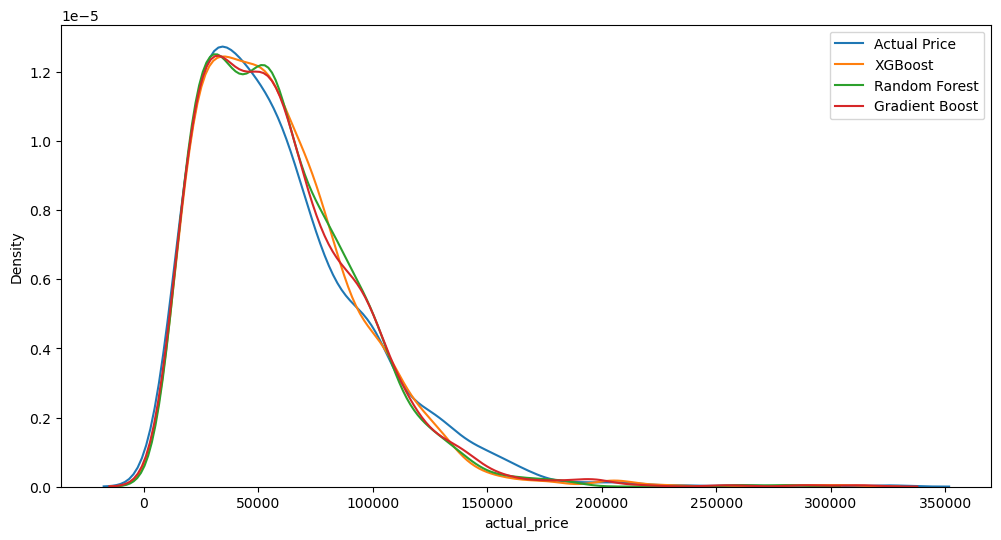

In [86]:
plt.figure(figsize = (12,6))
sns.kdeplot(x = 'actual_price', data = df_train, label = 'Actual Price')
sns.kdeplot(x = 'xgb_price', data = df_train, label = 'XGBoost')
sns.kdeplot(x = 'rfr_price', data = df_train, label = 'Random Forest')
sns.kdeplot(x = 'gbr_price', data = df_train, label = 'Gradient Boost')
plt.legend()
plt.show()

### **`Observations`**
- **Gradient Boosting** has the **best** cross-validation score (**89.59%**), meaning it **generalizes best** across different data splits.
- Also, it **performs well** on the validation set and test set.
- Therefore, **Gradient Boosting Regressor** is **chosen** as **final model** for training and evaluation.

# **`12. Model Evaluation`**

In [87]:
tuned_gbr = GradientBoostingRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5,
                                      subsample = 0.8, min_samples_split = 3, min_samples_leaf = 2, 
                                      learning_rate = 0.05, random_state = 2)
tuned_gbr.fit(X_train, y_train)
y_pred = tuned_gbr.predict(X_temp)
r2 = r2_score(y_temp, y_pred)
mae = mean_absolute_error(y_temp, y_pred)
print(f'R2 Score: {r2:0.4f}')
print(f'MAE (Mean Absolute Error): {mae:0.4f}')

R2 Score: 0.9066
MAE (Mean Absolute Error): 0.1349


### **`12.1. Testing Query Point`**

In [88]:
X.columns

Index(['company', 'type_name', 'os', 'gpu_company', 'cpu_model', 'screen_type',
       'touchscreen', 'ips_panel', 'ppi', 'ssd', 'hdd', 'flash_storage',
       'hybrid', 'ram', 'weight', 'cpu_freq'],
      dtype='object')

``Query point --> {'Dell','Notebook','Windows','Intel','Intel Core i5','Full HD',0,0,141.211,0,500,0,0,8,1.9,2.6}``

``Actual price for above query point is Rs.49,818/-``

In [89]:
query = np.array(['Dell', 'Notebook', 'Windows', 'Intel', 'Intel Core i5', 'Full HD', 0, 0, 141.211, 
                  0, 500, 0, 0, 8, 1.9, 2.6])
query = query.reshape(1,16)
query = preprocessor.transform(query)
query

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.45288385, 0.        , 0.24414062,
        0.        , 0.        , 0.2       , 0.43060498, 0.62962963]])

In [90]:
result1 = tuned_xgb.predict(query)
result2 = tuned_rfr.predict(query)
result3 = tuned_gbr.predict(query)

print(f'Actual Price: {round(np.exp(10.816132))}\n')
print(f'XGBoost --> Predicted price of a Laptop for given specifications is: {round(np.exp(result1)[0])} Rupees')
print(f'Random Forest --> Predicted price of a Laptop for given specifications is: {round(np.exp(result2)[0])} Rupees')
print(f'Gradient Boost --> Predicted price of a Laptop for given specifications is: {round(np.exp(result3)[0])} Rupees')

Actual Price: 49818

XGBoost --> Predicted price of a Laptop for given specifications is: 47355 Rupees
Random Forest --> Predicted price of a Laptop for given specifications is: 52042 Rupees
Gradient Boost --> Predicted price of a Laptop for given specifications is: 51337 Rupees


# **`13. Feature Importances`**

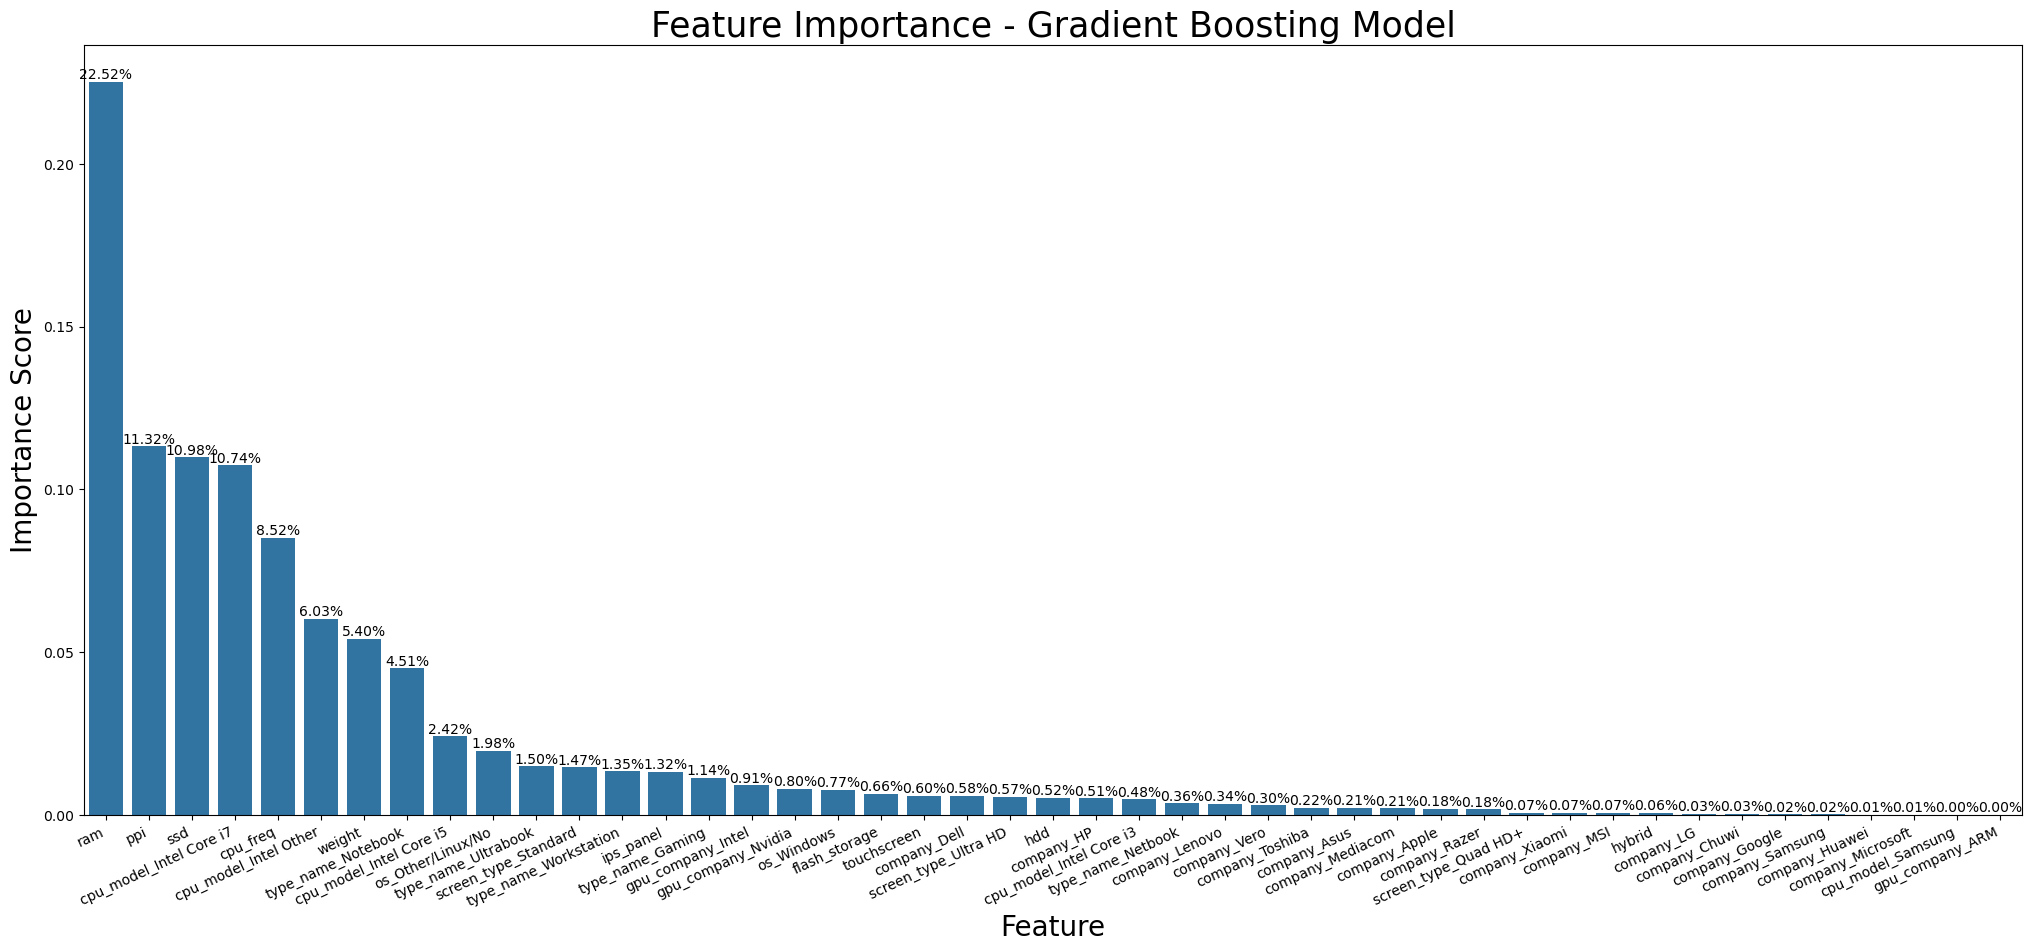

In [91]:
importance_df = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': tuned_gbr.feature_importances_
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(25, 10))
ax = sns.barplot(data = importance_df, y = 'Importance', x = 'Feature')
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{(label.get_height() * 100):0.2f}%' for label in bars], padding=0)
plt.xlabel("Feature", fontsize = 20)
plt.ylabel("Importance Score", fontsize = 20)
plt.title("Feature Importance - Gradient Boosting Model", fontsize = 25)
plt.xticks(rotation = 25, ha = 'right')
plt.show()

### **`Feature Importances`**
- As seen in the plot; **RAM**, **PPI(Screen Size and Resolution)**, **Storage Type**, **CPU Company**, **Model** & **Frequency**, **Weight** and **Type** of laptops are among the **top 5 important features** contributing significantly in deciding the price of the laptop.
- **'RAM & Storage Type'**: Larger RAM and SSDs usually increase price more than HDDs.
- **'Screen Size and Resolution'**: Higher resolution and large screens contribute to pricing
- **'Processor Type and Speed'**: High-performance processors (e.g., Intel Core i7) significantly impact cost.
- **'Brand Premiums'**: Some brands may have higher baseline pricing, impacting predictions.

# **`14. Key Takeaways`**

The **Gradient Boosting Regressor** demonstrated strong predictive performance for laptop price estimation, achieving an R2 score of 0.9066 and a Mean Absolute Error (MAE) of 0.1349. These metrics indicate that the model successfully captures key patterns in the data, leading to accurate price predictions.

1. **High Accuracy (R2 Score = 0.9066)** --> The model explains **90.66%** of the price variance, making it a **reliable** predictor.
2. **Low Error (MAE = 0.1349)** --> Predictions are close to actual values, **minimizing deviation**.
3. **Gradient Boosting's Strengths** --> Handles nonlinear relationships effectively, leading to **superior generalization**.

# **`15. Exporting the Model`**

In [92]:
import joblib

joblib.dump(df_final, r'C:\Users\anike\DATA SCIENCE AND AI\ML Projects\smartbuy-predictive-analytics-for-laptop-prices\data\processed\df.joblib')
joblib.dump(preprocessor, r'C:\Users\anike\DATA SCIENCE AND AI\ML Projects\smartbuy-predictive-analytics-for-laptop-prices\models\preprocessor.joblib')
joblib.dump(tuned_gbr, r'C:\Users\anike\DATA SCIENCE AND AI\ML Projects\smartbuy-predictive-analytics-for-laptop-prices\models\model.joblib')

['C:\\Users\\anike\\DATA SCIENCE AND AI\\ML Projects\\smartbuy-predictive-analytics-for-laptop-prices\\models\\model.joblib']

# **`D. Conclusion`**

**SmartBuy** successfully leverages predictive analytics to enhance laptop price estimation, ensuring informed decisions for both consumers and businesses. By utilizing machine learning models such as Gradient Boosting, Random Forest, and XGBoost, the system achieves high accuracy in price predictions based on key specifications like RAM, storage, display quality, processor type and brand.

**Key Outcomes**
1. **Improved Pricing Accuracy** --> Helps buyers and sellers make data-driven decisions.
2. **Optimized Inventory Management** --> Retailers can adjust stock based on pricing trends.
3. **Competitive Market Insights** --> Businesses can benchmark prices against competitors.
4. **Enhanced Consumer Experience** --> Consumers receive fair pricing recommendations tailored to their needs.

**Future Enhancements**
- **Real-Time Market Adjustments** --> Incorporating dynamic pricing based on demand fluctuations.
- **Feature Expansion** --> Considering additional elements like battery life, thickness, warranty & support, keyboard type and build material for refined predictions.
- **Integration with E-commerce Platforms** --> SmartBuy can be connected with online retailers to provide seamless pricing insights.

With its robust predictive capabilities, SmartBuy transforms laptop pricing into a strategic advantage, benefiting both businesses and consumers by delivering accurate, data-driven price recommendations.